## Exploring larval _Drosophila_ anemotaxis behavioural data
Written by Sharbat based on Timothee, with help from GitHub Copilot, 2025

In [1]:
import os
import pandas as pd
from matplotlib import cm 
import matplotlib.pyplot as plt 
from scipy import stats
import numpy as np
import src.parse_data as anm_parse
import src.plot_data as anm_plot
from matplotlib import animation
plt.style.use('../anemotaxis.mplstyle')

In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [3]:
data_folder = "/Users/sharbat/Documents/anemotaxis/data/20240219_140808/"
columns = ["time","id","persistence","speed","midline","loc_x","loc_y","vel_x","vel_y","orient","pathlen"]
larvae_data = anm_parse.extract_all_larvae(data_folder, columns)

In [4]:
from pprint import pprint
larva_id = '30.00003'
# Accessing metadata, data, and summary for larva "30.00001"
pprint(larvae_data[larva_id]["metadata"])  # Experiment details
# pprint(larvae_data["30.00001"]["data"])     # Extracted raw data (commented out)
pprint(larvae_data[larva_id]["summary"])   # Summary statistics

{'date': '20240219_140808',
 'effector': 'UAS_TNT_2_0003',
 'genotype': 'GMR_SS01948',
 'interval_between_repetitions': '0s',
 'number_of_repetitions': 1,
 'prestimulus_duration': '2s',
 'raw_protocol': 'p_5gradient2_2s1x600s0s#n#n#n',
 'stimulus_duration': '600s',
 'stimulus_specifications': '5gradient2',
 'stimulus_type': 'p',
 'tracker': 't7'}
{'id': {'max': np.int64(3),
        'mean': np.float64(3.0),
        'min': np.int64(3),
        'size': 7018},
 'loc_x': {'max': np.float64(100.933),
           'mean': np.float64(84.45570376175549),
           'min': np.float64(70.64),
           'size': 7018},
 'loc_y': {'max': np.float64(59.064),
           'mean': np.float64(49.02224052436592),
           'min': np.float64(40.772),
           'size': 7018},
 'midline': {'max': np.float64(3.649),
             'mean': np.float64(2.886125819321744),
             'min': np.float64(1.375),
             'size': 7018},
 'orient': {'max': np.float64(179.9),
            'mean': np.float64(0.196152

### Single larva parameter plots

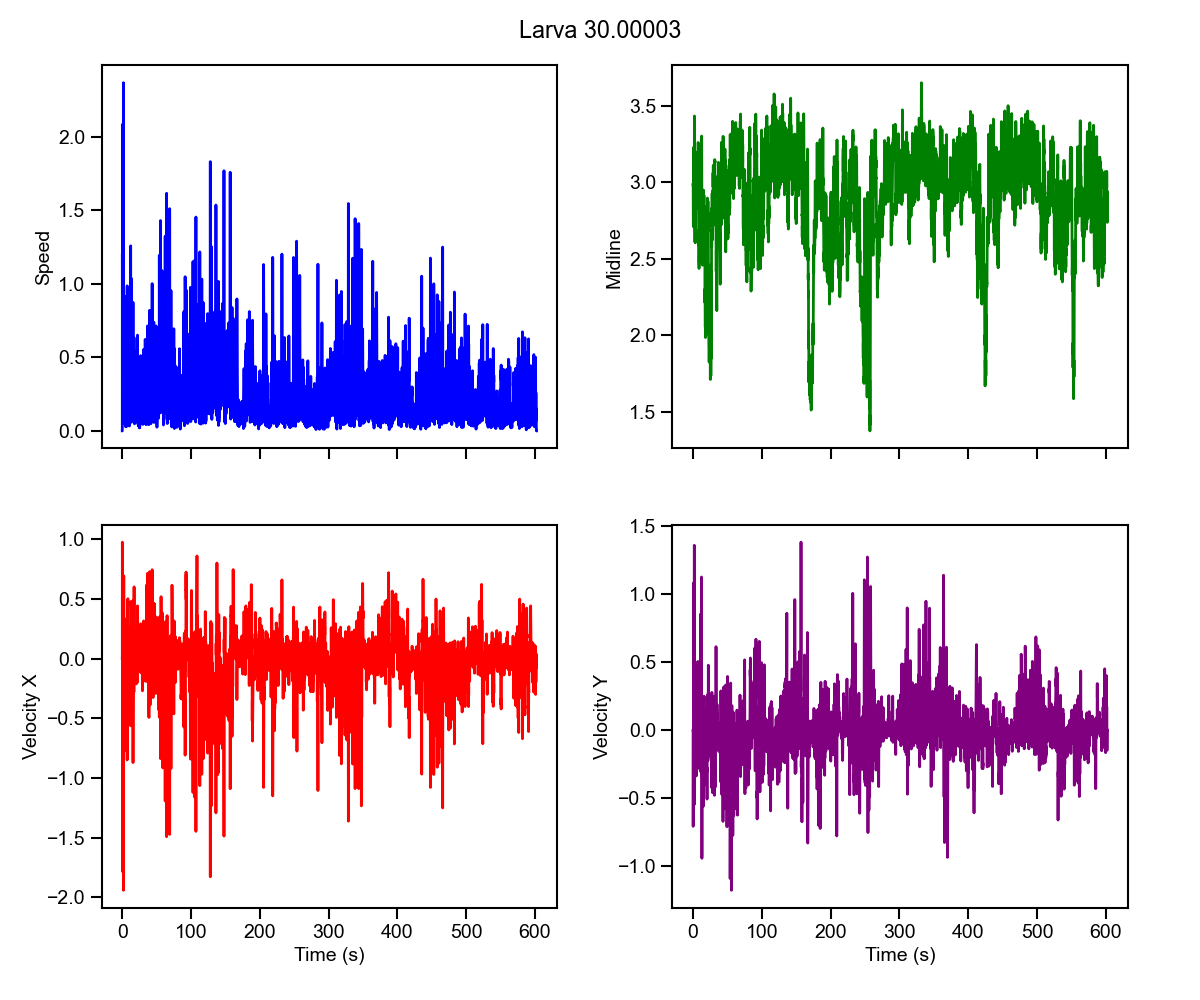

In [5]:
anm_plot.plot_larva_data(larvae_data[larva_id]['data'], larva_id)

In [6]:
larva_id = '30.00001'

FloatSlider(value=0.007, description='Time', layout=Layout(width='800px'), max=602.17, min=0.007, step=0.08580…

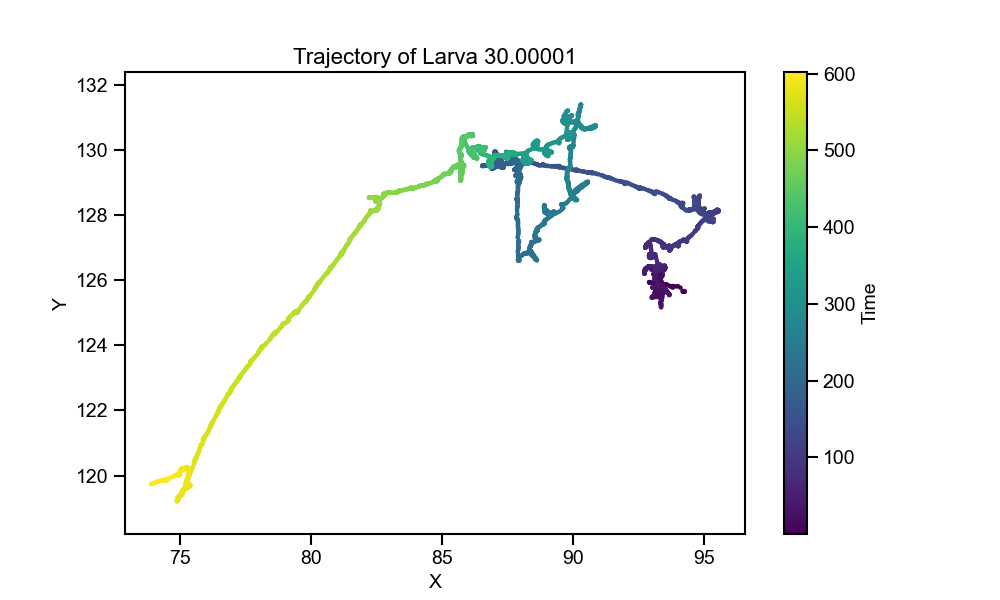

In [7]:
anm_plot.plot_trajectory_2d_interactive(larvae_data[larva_id]["data"], larva_id)

### K-means clustering on dimension-reduced behaviour data

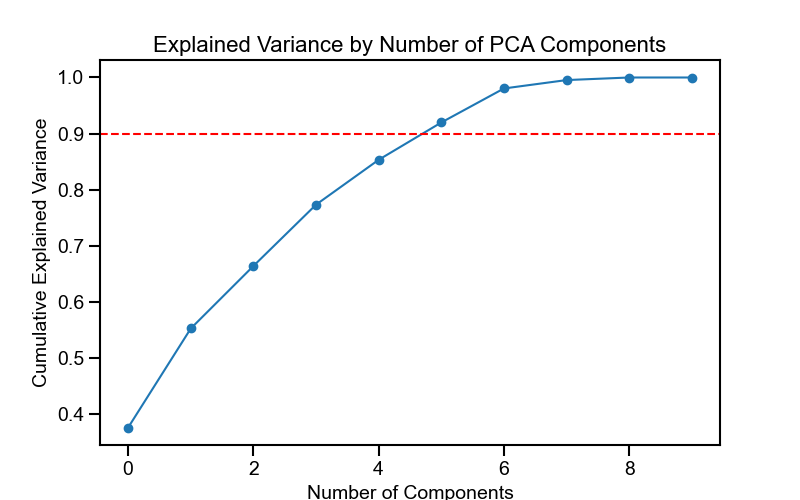

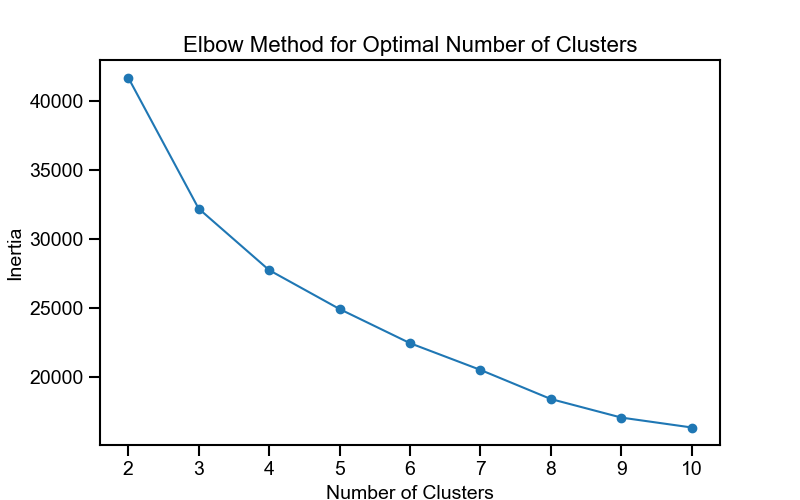

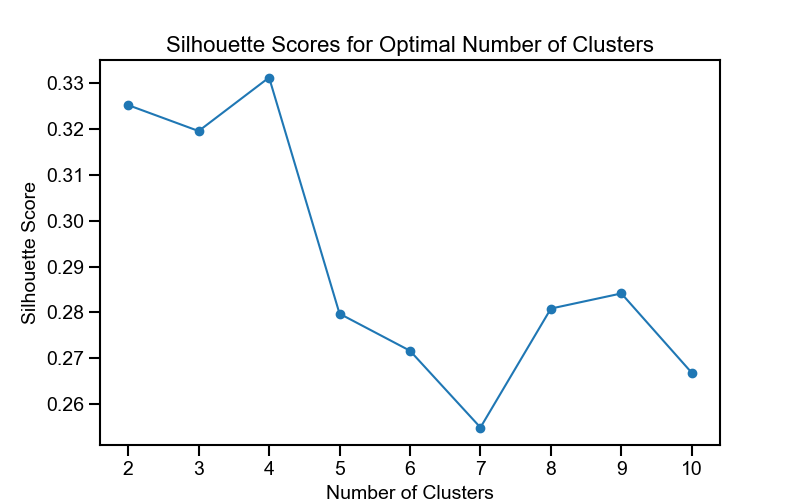

Optimal number of PCA components: 6
Optimal number of clusters: 4


In [8]:
clustered_data, optimal_components, optimal_clusters = anm_parse.cluster_behaviors(larvae_data[larva_id]["data"], variance_threshold=0.90, max_clusters=10)
print(f'Optimal number of PCA components: {optimal_components}')
print(f'Optimal number of clusters: {optimal_clusters}')

In [9]:
clustered_data

time  persistence  speed  midline   loc_x    loc_y  vel_x  vel_y  \
0       0.007        602.2  0.000    3.130  94.210  125.643  0.000  0.000   
1       0.062        602.2  0.000    3.088  94.219  125.655  0.000  0.000   
2       0.116        602.2  0.247    2.972  94.186  125.654  0.247  0.015   
3       0.171        602.2  0.384    3.032  94.252  125.649  0.382 -0.034   
4       0.226        602.2  0.231    2.972  94.262  125.647  0.229  0.028   
...       ...          ...    ...      ...     ...      ...    ...    ...   
7013  601.811        602.2  0.504    3.273  74.054  119.782 -0.478 -0.158   
7014  601.901        602.2  0.558    3.392  74.004  119.768 -0.539 -0.143   
7015  601.989        602.2  0.000    3.317  73.959  119.757  0.000  0.000   
7016  602.076        602.2  0.000    3.289  73.895  119.742  0.000  0.000   
7017  602.170        602.2  0.000    3.281  73.912  119.741  0.000  0.000   

      orient  pathlen  cluster     pca_1     pca_2     pca_3     pca_4  \
0      173.6    0.000        2  2.662935  0.445205 -0.180521 -0.829590   
1      173.2    0.000        2  2.686698  0.390985 -0.220193 -0.817779   
2      173.3    0.000        2  2.920024  0.569611  0.073767 -1.668280   
3      173.8    0.000        2  2.921890  0.872629  0.055262 -2.052598   
4      174.1    0.000        2  2.933485  0.547240  0.118974 -1.632565   
...      ...      ...      ...       ...       ...       ...       ...   
7013  -168.8   25.948        1 -5.066866  2.967738 -0.773049 -0.746400   
7014  -169.2   25.948        1 -5.150930  3.507885 -0.633360 -0.709129   
7015  -169.4   25.948        1 -4.706401 -0.574287  0.435362 -1.760770   
7016  -169.5   25.948        1 -4.699459 -0.609546  0.408290 -1.758904   
7017  -169.3   25.948        1 -4.693041 -0.619058  0.401188 -1.756587   

         pca_5     pca_6  
0     0.741830  1.661111  
1     0.687024  1.674863  
2     1.404118  1.089870  
3     2.157394  0.746921  
4     1.294696  1.129496  
...        ...       ...  
7013 -1.312138  0.690266  
7014 -1.427280  0.559032  
7015 -0.126019  1.274720  
7016 -0.164449  1.290958  
7017 -0.174233  1.295845  

[7018 rows x 17 columns]

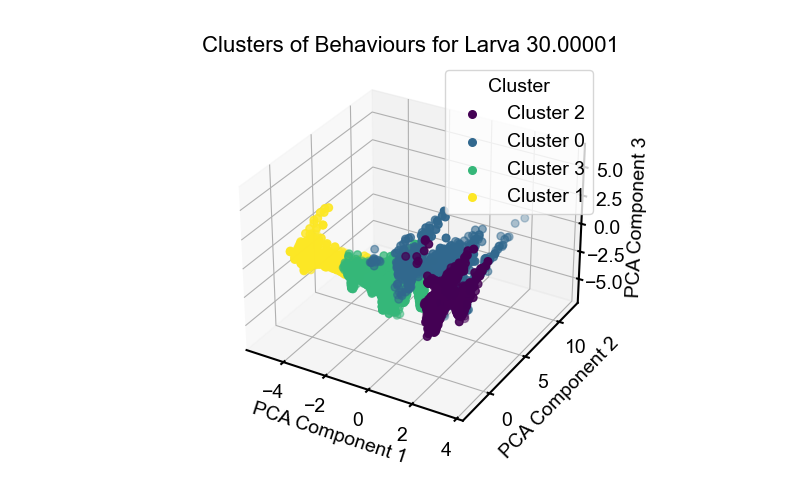

In [10]:
anm_plot.plot_clusters(clustered_data, larva_id, n_components=3)

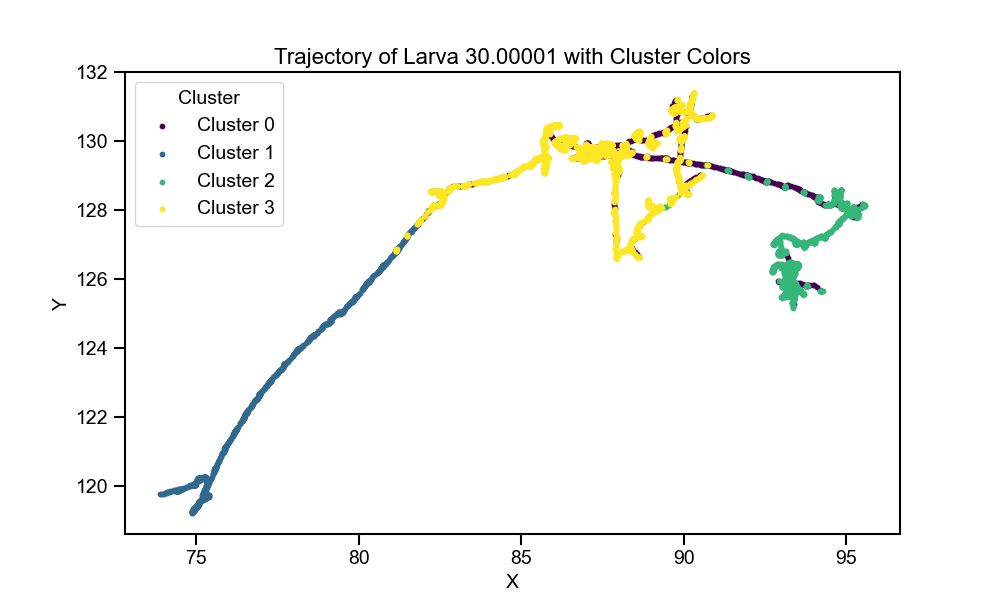

In [11]:
anm_plot.plot_trajectory_with_clusters(larvae_data[larva_id]["data"], clustered_data, larva_id)

### Mean $N_{ind}$ calculation
Check the code in `parse_data.py` for calculation of $N_{ind}$ along both X-axis and Y-axis

In [12]:
ni_dict_x = anm_parse.compute_navigational_index(larvae_data, ax="x")
ni_dict_y = anm_parse.compute_navigational_index(larvae_data, ax="y")
for larva_id, ni in ni_dict_x.items():
    print(f"Larva {larva_id} - Navigational Index: {ni['NI_mean']}, Normalized Navigational Index: {ni['NI_norm']}")

Larva 30.00382 - Navigational Index: 0      -0.33099
1      -0.33099
2      -0.33099
3      -0.33099
4      -0.33099
         ...   
1982   -0.33099
1983   -0.33099
1984   -0.33099
1985   -0.33099
1986   -0.33099
Name: NI_mean, Length: 1987, dtype: float64, Normalized Navigational Index: 0      -0.33099
1      -0.33099
2      -0.33099
3      -0.33099
4      -0.33099
         ...   
1982   -0.33099
1983   -0.33099
1984   -0.33099
1985   -0.33099
1986   -0.33099
Name: NI_norm, Length: 1987, dtype: float64
Larva 30.00022 - Navigational Index: 0      -0.308277
1      -0.308277
2      -0.308277
3      -0.308277
4      -0.308277
          ...   
7013   -0.308277
7014   -0.308277
7015   -0.308277
7016   -0.308277
7017   -0.308277
Name: NI_mean, Length: 7018, dtype: float64, Normalized Navigational Index: 0      -0.308277
1      -0.308277
2      -0.308277
3      -0.308277
4      -0.308277
          ...   
7013   -0.308277
7014   -0.308277
7015   -0.308277
7016   -0.308277
7017   -0.308277
Name

### Histogram mean X-axis $N_{ind}$ across larvae

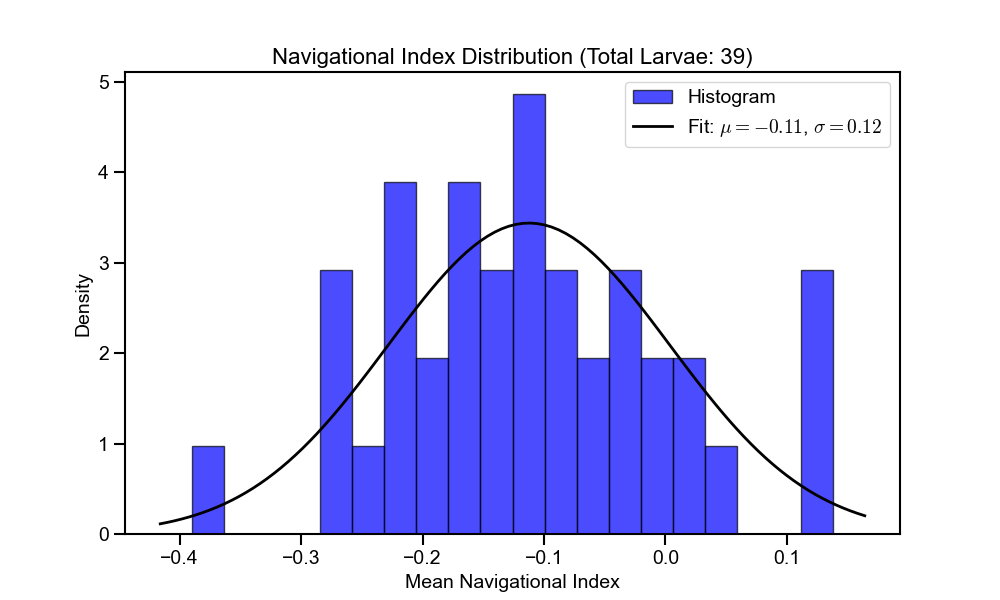

Mean Navigational Index: -0.11
Standard Deviation of Navigational Index: 0.12


In [13]:
anm_plot.plot_navigational_index_histogram(ni_dict_x, bins=20, density=True, fit_distribution=True)

### Histogram mean Y-axis $N_{ind}$ across larvae

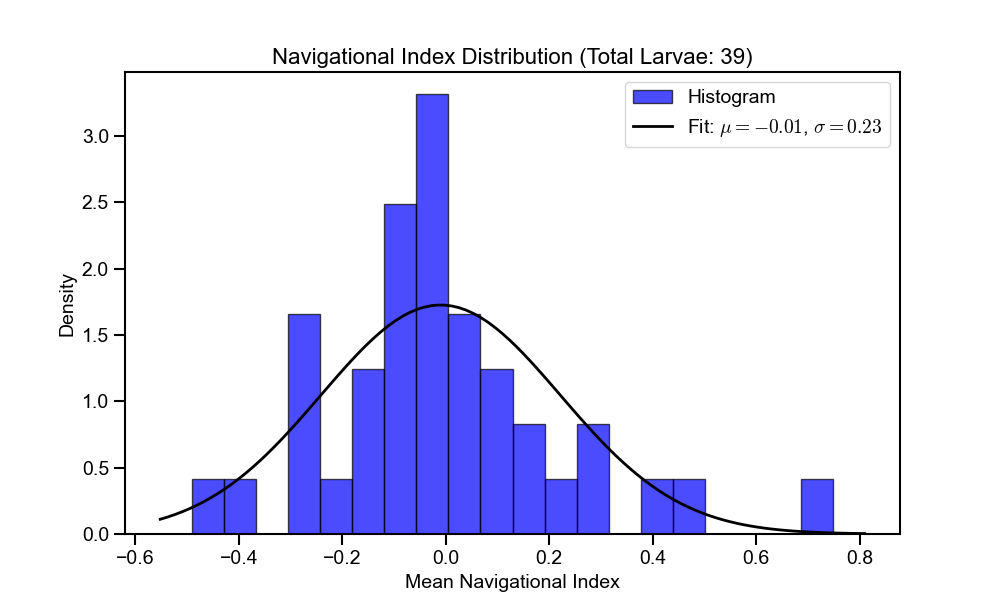

Mean Navigational Index: -0.01
Standard Deviation of Navigational Index: 0.23


In [14]:
anm_plot.plot_navigational_index_histogram(ni_dict_y, bins=20, density=True, fit_distribution=True)

### Individual X- and Y-axis $N_{ind}$ time-series 

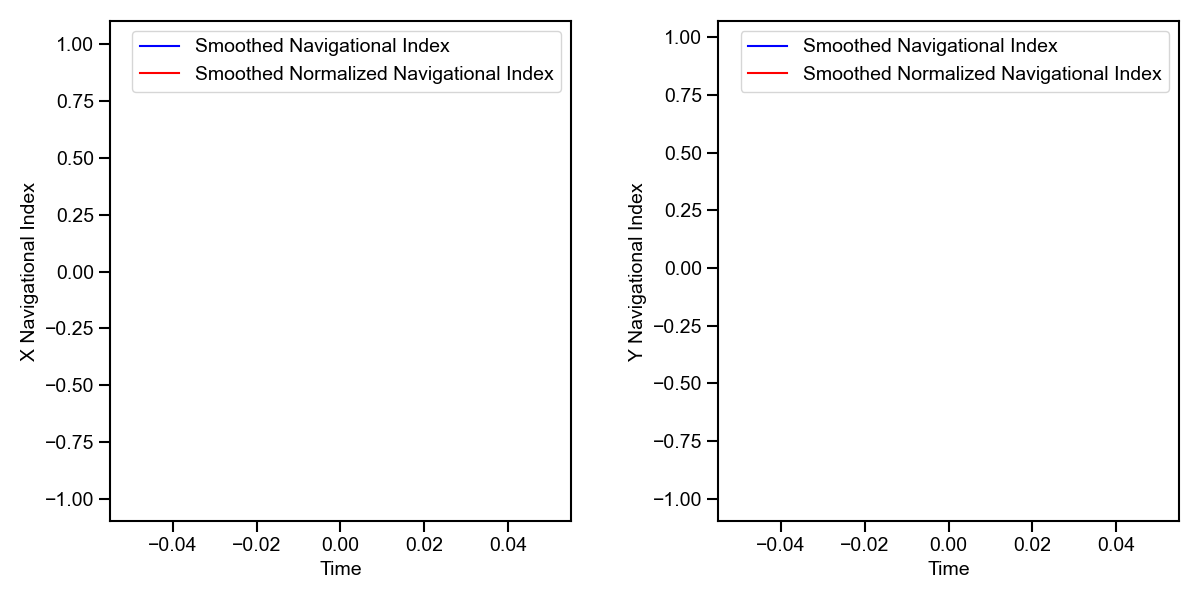

In [15]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Turn off automatic displaying of figures
plt.ioff()

# Convert dictionary keys to sorted list for consistent indexing
larva_ids = sorted(list(ni_dict_x.keys()))  # Assuming same larvae in both dicts

# Create the figures and axes with horizontal layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
window_size = 500

# Pre-compute all smoothed data
smoothed_data_x = {}
smoothed_data_y = {}
y_min_x, y_max_x = float('inf'), float('-inf')
y_min_y, y_max_y = float('inf'), float('-inf')

for larva_id in larva_ids:
    # Process X data
    ni_df_x = ni_dict_x[larva_id]
    smoothed_data_x[larva_id] = {
        'NI_smooth': ni_df_x["NI"].rolling(window=window_size, min_periods=1).mean(),
        'NI_norm_smooth': ni_df_x["NI_norm"].rolling(window=window_size, min_periods=1).mean(),
        'time': ni_df_x["time"]
    }
    y_min_x = min(y_min_x, smoothed_data_x[larva_id]['NI_smooth'].min(), 
                  smoothed_data_x[larva_id]['NI_norm_smooth'].min())
    y_max_x = max(y_max_x, smoothed_data_x[larva_id]['NI_smooth'].max(), 
                  smoothed_data_x[larva_id]['NI_norm_smooth'].max())
    
    # Process Y data
    ni_df_y = ni_dict_y[larva_id]
    smoothed_data_y[larva_id] = {
        'NI_smooth': ni_df_y["NI"].rolling(window=window_size, min_periods=1).mean(),
        'NI_norm_smooth': ni_df_y["NI_norm"].rolling(window=window_size, min_periods=1).mean(),
        'time': ni_df_y["time"]
    }
    y_min_y = min(y_min_y, smoothed_data_y[larva_id]['NI_smooth'].min(), 
                  smoothed_data_y[larva_id]['NI_norm_smooth'].min())
    y_max_y = max(y_max_y, smoothed_data_y[larva_id]['NI_smooth'].max(), 
                  smoothed_data_y[larva_id]['NI_norm_smooth'].max())

# Initialize empty lines for both plots
line1_x, = ax1.plot([], [], label="Smoothed Navigational Index", color="blue")
line2_x, = ax1.plot([], [], label="Smoothed Normalized Navigational Index", color="red")
line1_y, = ax2.plot([], [], label="Smoothed Navigational Index", color="blue")
line2_y, = ax2.plot([], [], label="Smoothed Normalized Navigational Index", color="red")

# Set axis properties
ax1.set_ylim(y_min_x - 0.1, y_max_x + 0.1)
ax1.set_xlabel("Time")
ax1.set_ylabel("X Navigational Index")
ax1.legend()

ax2.set_ylim(y_min_y - 0.1, y_max_y + 0.1)
ax2.set_xlabel("Time")
ax2.set_ylabel("Y Navigational Index")
ax2.legend()

plt.tight_layout(w_pad=3.0)  # Add horizontal space between subplots

# Create play button and slider
play = widgets.Play(
    value=0,
    min=0,
    max=len(larva_ids) - 1,
    step=1,
    interval=500,
    description="Play"
)

slider = widgets.IntSlider(
    min=0,
    max=len(larva_ids) - 1,
    description='Larva:',
    value=0,
    style={'description_width': 'initial'},
    readout_format='d',
    layout=widgets.Layout(width='1000px')
)

# Link play button with slider
widgets.jslink((play, 'value'), (slider, 'value'))

def update_plot(change):
    if change['type'] == 'change' and change['name'] == 'value':
        index = change['new']
        larva_id = larva_ids[index]
        
        # Update X data
        data_x = smoothed_data_x[larva_id]
        line1_x.set_data(data_x['time'], data_x['NI_smooth'])
        line2_x.set_data(data_x['time'], data_x['NI_norm_smooth'])
        ax1.set_xlim(data_x['time'].min(), data_x['time'].max())
        ax1.set_title(f"X Navigational Index (Larva {larva_id})", fontsize = 12)
        
        # Update Y data
        data_y = smoothed_data_y[larva_id]
        line1_y.set_data(data_y['time'], data_y['NI_smooth'])
        line2_y.set_data(data_y['time'], data_y['NI_norm_smooth'])
        ax2.set_xlim(data_y['time'].min(), data_y['time'].max())
        ax2.set_title(f"Y Navigational Index (Larva {larva_id})", fontsize = 12)
        
        # Redraw canvas
        fig.canvas.draw_idle()

# Register the callback
slider.observe(update_plot)

# Display controls and figure
display(widgets.HBox([play, slider]))
display(fig.canvas)

# Initialize plot
update_plot({'type': 'change', 'name': 'value', 'new': 0})

In [16]:
def save_ni_animation(ni_dict_x, ni_dict_y, output_path='navigational_indices.mp4', fps=2):
    """Save navigational indices animation as video."""
    plt.ioff()
    
    # Setup
    larva_ids = sorted(list(ni_dict_x.keys()))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    window_size = 500
    
    # Pre-compute data
    smoothed_data_x = {}
    smoothed_data_y = {}
    y_min_x, y_max_x = float('inf'), float('-inf')
    y_min_y, y_max_y = float('inf'), float('-inf')
    
    # Process data (same as original)
    for larva_id in larva_ids:
        # Process X data
        ni_df_x = ni_dict_x[larva_id]
        smoothed_data_x[larva_id] = {
            'NI_smooth': ni_df_x["NI"].rolling(window=window_size, min_periods=1).mean(),
            'NI_norm_smooth': ni_df_x["NI_norm"].rolling(window=window_size, min_periods=1).mean(),
            'time': ni_df_x["time"]
        }
        y_min_x = min(y_min_x, smoothed_data_x[larva_id]['NI_smooth'].min(), 
                      smoothed_data_x[larva_id]['NI_norm_smooth'].min())
        y_max_x = max(y_max_x, smoothed_data_x[larva_id]['NI_smooth'].max(), 
                      smoothed_data_x[larva_id]['NI_norm_smooth'].max())
        
        # Process Y data
        ni_df_y = ni_dict_y[larva_id]
        smoothed_data_y[larva_id] = {
            'NI_smooth': ni_df_y["NI"].rolling(window=window_size, min_periods=1).mean(),
            'NI_norm_smooth': ni_df_y["NI_norm"].rolling(window=window_size, min_periods=1).mean(),
            'time': ni_df_y["time"]
        }
        y_min_y = min(y_min_y, smoothed_data_y[larva_id]['NI_smooth'].min(), 
                      smoothed_data_y[larva_id]['NI_norm_smooth'].min())
        y_max_y = max(y_max_y, smoothed_data_y[larva_id]['NI_smooth'].max(), 
                      smoothed_data_y[larva_id]['NI_norm_smooth'].max())
    
    # Create directory if needed
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    # Setup video writer
    writer = animation.FFMpegWriter(fps=fps)
    
    with writer.saving(fig, output_path, dpi=100):
        for idx, larva_id in enumerate(larva_ids):
            # Clear axes
            ax1.clear()
            ax2.clear()
            
            # Get data
            data_x = smoothed_data_x[larva_id]
            data_y = smoothed_data_y[larva_id]
            
            # Plot X data
            ax1.plot(data_x['time'], data_x['NI_smooth'], 'b-', label="Smoothed NI")
            ax1.plot(data_x['time'], data_x['NI_norm_smooth'], 'r-', label="Smoothed Normalized NI")
            ax1.set_ylim(y_min_x - 0.1, y_max_x + 0.1)
            ax1.set_xlabel("Time")
            ax1.set_ylabel("X Navigational Index")
            ax1.set_title(f"X Navigational Index (Larva {larva_id})")
            ax1.legend()
            
            # Plot Y data
            ax2.plot(data_y['time'], data_y['NI_smooth'], 'b-', label="Smoothed NI")
            ax2.plot(data_y['time'], data_y['NI_norm_smooth'], 'r-', label="Smoothed Normalized NI")
            ax2.set_ylim(y_min_y - 0.1, y_max_y + 0.1)
            ax2.set_xlabel("Time")
            ax2.set_ylabel("Y Navigational Index")
            ax2.set_title(f"Y Navigational Index (Larva {larva_id})")
            ax2.legend()
            
            plt.tight_layout(w_pad=3.0)
            
            # Grab the frame
            writer.grab_frame()
            
            # Print progress
            print(f"Processing larva {idx+1}/{len(larva_ids)}", end='\r')
        
        print("\nVideo saved successfully!")

# Generate the video
save_ni_animation(ni_dict_x, ni_dict_y, '../results/navigational_indices.mp4', fps=2)

Processing larva 39/39
Video saved successfully!


### Normalised X-axis $N_{ind}$ across individuals

/Users/sharbat/Documents/anemotaxis/src/plot_data.py:260: RuntimeWarning: Mean of empty slice
  mean_ni = np.nanmean(interpolated_ni, axis=0)
/Users/sharbat/miniconda3/envs/anemotaxis/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


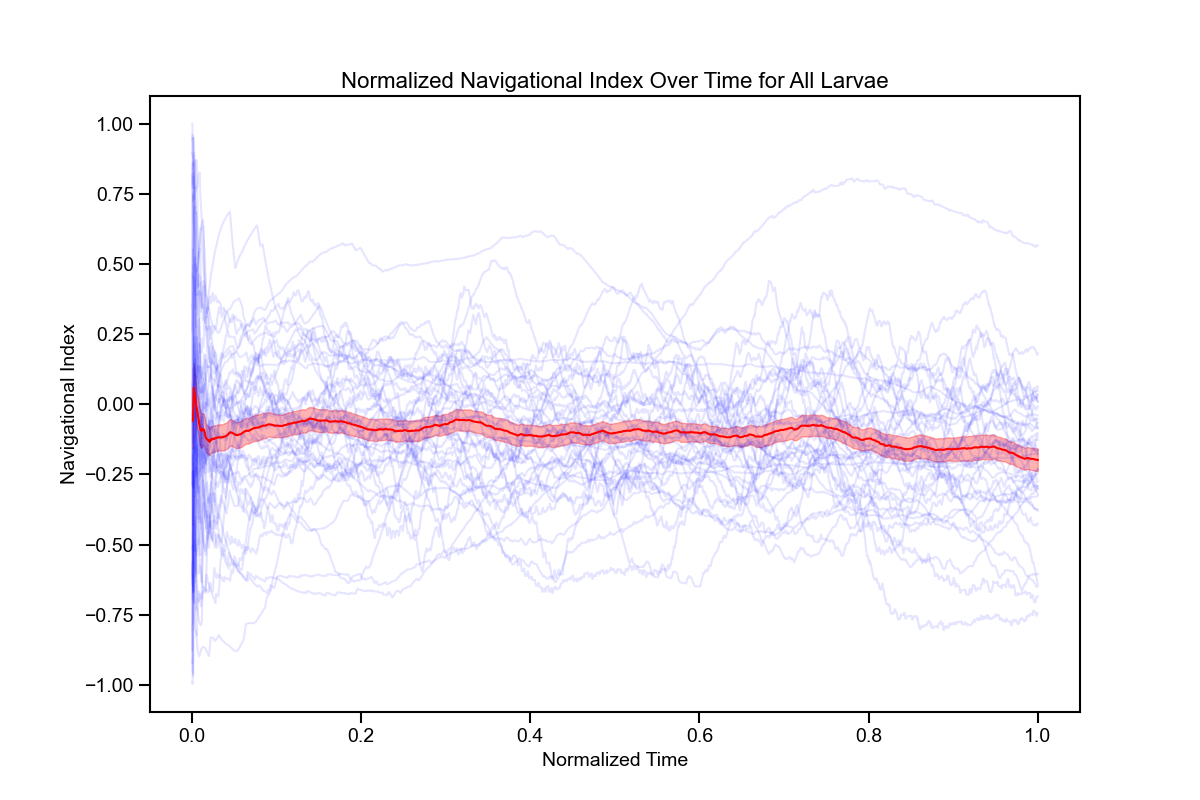

In [17]:
window_size = 500
anm_plot.plot_normalized_navigational_index_time_series(ni_dict_x, window_size=window_size)

/Users/sharbat/Documents/anemotaxis/src/plot_data.py:300: RuntimeWarning: Mean of empty slice
  mean_ni = np.nanmean(interpolated_ni, axis=0)


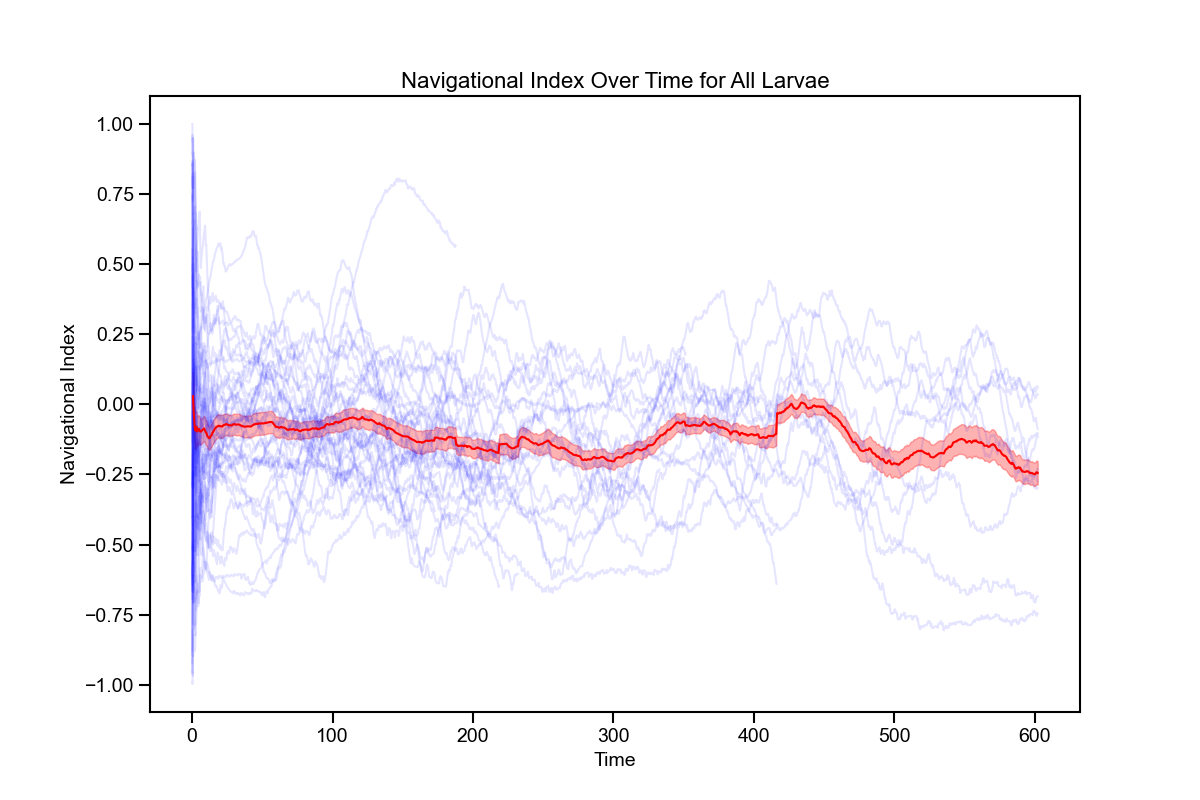

In [18]:
anm_plot.plot_navigational_index_time_series_together(ni_dict_x, window_size=window_size)

### Normalised Y-axis $N_{ind}$ across individuals

/Users/sharbat/Documents/anemotaxis/src/plot_data.py:260: RuntimeWarning: Mean of empty slice
  mean_ni = np.nanmean(interpolated_ni, axis=0)
/Users/sharbat/miniconda3/envs/anemotaxis/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


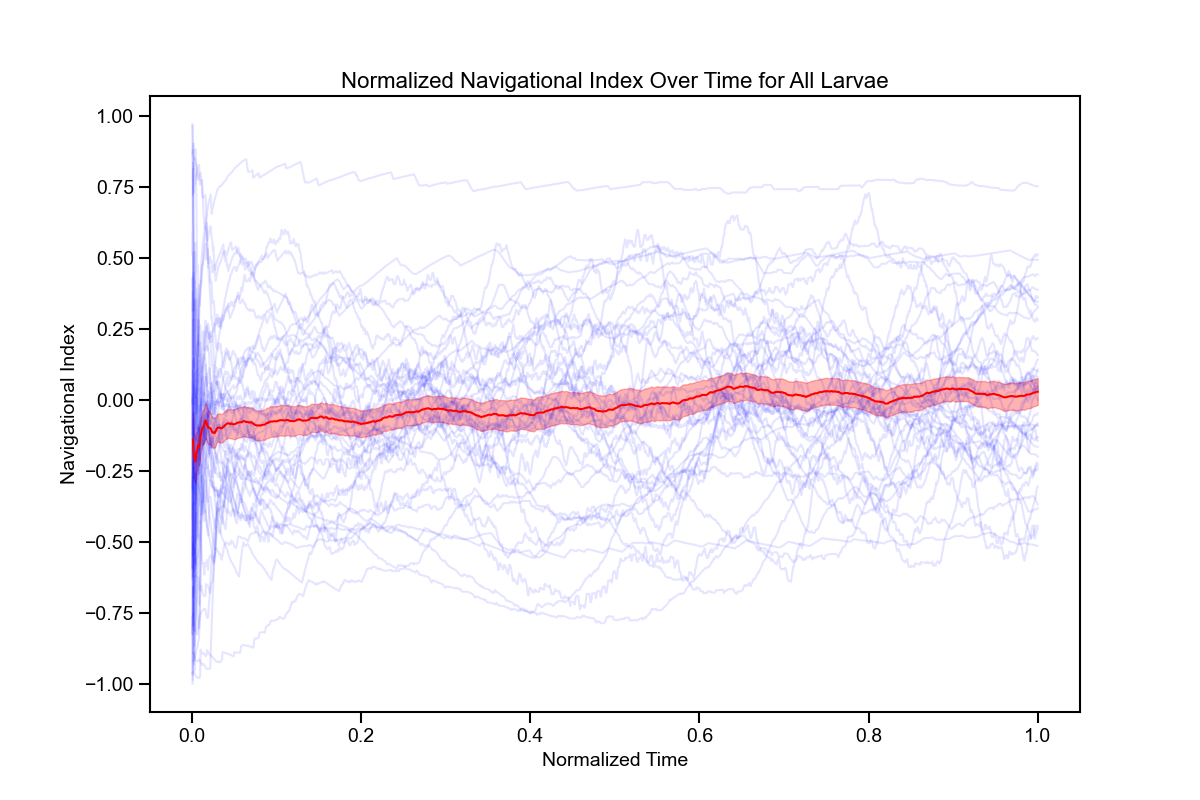

In [19]:
window_size = 500
anm_plot.plot_normalized_navigational_index_time_series(ni_dict_y, window_size=window_size)

/Users/sharbat/Documents/anemotaxis/src/plot_data.py:300: RuntimeWarning: Mean of empty slice
  mean_ni = np.nanmean(interpolated_ni, axis=0)


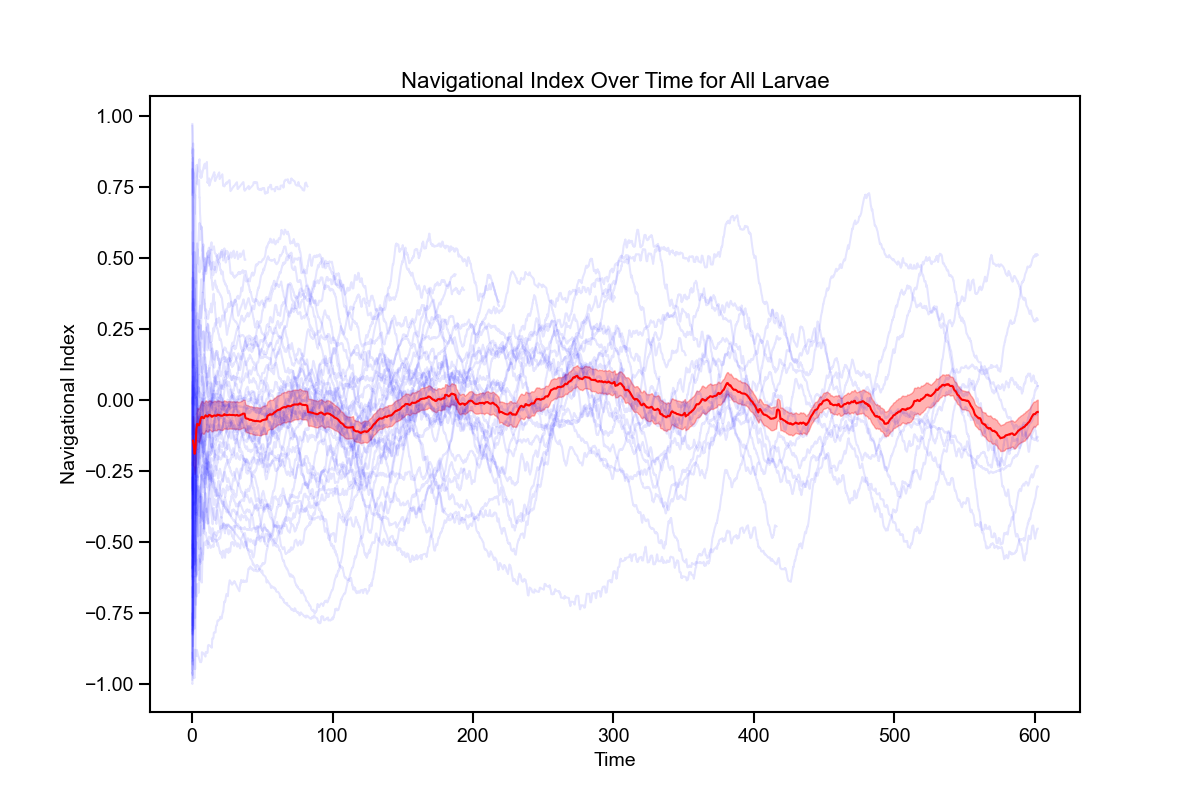

In [20]:
anm_plot.plot_navigational_index_time_series_together(ni_dict_y, window_size=window_size)

### Discussion and TO DO
- Test how each larvae (or track) moves across time
- Write unit tests

## Exploring `trx.mat` data

In [21]:
# trx_path = "/Users/sharbat/Documents/anemotaxis/data/20240219_140808/trx.mat"
# trx_sharbat = anm_parse.import_trx_sharbat(trx_path)
# trx_tim = anm_parse.import_trx(trx_path)

In [22]:
import h5py
def print_trx_structure(filepath):
    """
    Print the detailed structure of 'trx' group in a .mat file including nested references.
    
    Args:
        filepath (str): Path to the .mat file
    """
    with h5py.File(filepath, 'r') as f:
        print("\n=== TRX Structure ===")
        if 'trx' not in f:
            print("No 'trx' group found in file")
            return
            
        trx = f['trx']
        
        def explore_reference(obj):
            """Helper function to explore object references"""
            if isinstance(obj, h5py.Reference):
                referenced_obj = f[obj]
                if isinstance(referenced_obj, h5py.Dataset):
                    return f"Referenced Dataset - Shape: {referenced_obj.shape}, Type: {referenced_obj.dtype}"
                else:
                    return "Referenced Group"
            return None
        
        # Print all fields in trx
        for field_name, field_obj in trx.items():
            print(f"\n=== {field_name} ===")
            
            # Handle dataset case
            if isinstance(field_obj, h5py.Dataset):
                print(f"Shape: {field_obj.shape}")
                print(f"Type: {field_obj.dtype}")
                
                # If it's an array of objects, explore each element
                if field_obj.dtype == np.dtype('object'):
                    for i in range(min(field_obj.shape[0], 5)):  # Look at first 5 elements
                        try:
                            ref_info = explore_reference(field_obj[i])
                            if ref_info:
                                print(f"Element {i}: {ref_info}")
                        except Exception as e:
                            print(f"Could not explore element {i}: {str(e)}")
            
            # Handle group case
            elif isinstance(field_obj, h5py.Group):
                print("Group containing:")
                for subfield_name, subfield_obj in field_obj.items():
                    print(f"  └── {subfield_name}")
                    print(f"      ├── Shape: {subfield_obj.shape}")
                    print(f"      └── Type: {subfield_obj.dtype}")

# Use the function
path = "/Users/sharbat/Documents/anemotaxis/data/20240219_140808/trx.mat"
print_trx_structure(path)



=== TRX Structure ===

=== As_smooth_5 ===
Shape: (1, 59)
Type: object

=== S ===
Shape: (1, 59)
Type: object

=== S_deriv_smooth_5 ===
Shape: (1, 59)
Type: object

=== S_smooth_5 ===
Shape: (1, 59)
Type: object

=== angle_downer_upper_deriv_smooth_5 ===
Shape: (1, 59)
Type: object

=== angle_downer_upper_smooth_5 ===
Shape: (1, 59)
Type: object

=== angle_upper_lower_deriv_smooth_5 ===
Shape: (1, 59)
Type: object

=== angle_upper_lower_smooth_5 ===
Shape: (1, 59)
Type: object

=== back ===
Shape: (1, 59)
Type: object

=== back_large ===
Shape: (1, 59)
Type: object

=== back_strong ===
Shape: (1, 59)
Type: object

=== back_weak ===
Shape: (1, 59)
Type: object

=== ball_proba ===
Shape: (1, 59)
Type: object

=== bend_proba ===
Shape: (1, 59)
Type: object

=== cast ===
Shape: (1, 59)
Type: object

=== cast_large ===
Shape: (1, 59)
Type: object

=== cast_strong ===
Shape: (1, 59)
Type: object

=== cast_weak ===
Shape: (1, 59)
Type: object

=== curl_proba ===
Shape: (1, 59)
Type: object



In [23]:
def import_trx(path):
    """Import trx file and calculate behavior durations.
    
    Handles -1/1 encoded behaviors and calculates durations for all behavioral states
    including their variations (large, strong, weak).
    
    Args:
        path (str): Path to the .trx file
    Returns:
        dict: Data dictionary with behavior durations
    """
    with h5py.File(path, 'r') as f:
        fields = list(f['trx'].keys())
        trx_extracted = {}
        
        nb_larvae = f['trx'][fields[0]].shape[1]
        print(f"Number of larvae: {nb_larvae}")
        
        # Define all behavior types
        base_behaviors = ['run', 'cast', 'back', 'hunch', 'roll', 'stop']
        behavior_variants = ['', '_large', '_strong', '_weak']
        behaviors = [f"{b}{v}" for b in base_behaviors for v in behavior_variants]
        
        for i in range(nb_larvae):
            larva = {}
            for field in fields:
                try:
                    ref = f['trx'][field][0][i]
                    data = np.array(f[ref])
                    data = data.tolist()
                    data = data[0] if len(data) == 1 else data
                    larva[field] = data
                except Exception as e:
                    print(f"Warning: Could not process field '{field}' for larva {i}: {str(e)}")
                    larva[field] = None
            
            # Calculate number of timesteps
            larva["nb_timestep"] = len(larva["t"]) if "t" in larva else 0
            
            # Calculate durations for all behavioral states
            for behavior in behaviors:
                if behavior in larva and larva[behavior] is not None:
                    # Convert -1/1 to 0/1 and sum
                    behavior_data = np.array(larva[behavior])
                    active_frames = np.sum((behavior_data + 1) / 2)
                    total_frames = len(behavior_data)
                    
                    # Store both absolute and relative durations
                    larva[f"{behavior}_duration"] = active_frames
                    larva[f"{behavior}_fraction"] = active_frames / total_frames if total_frames > 0 else 0
                else:
                    larva[f"{behavior}_duration"] = 0
                    larva[f"{behavior}_fraction"] = 0
            
            # Calculate total active time (any behavior)
            all_behaviors = [b for b in behaviors if b in larva and larva[b] is not None]
            if all_behaviors:
                behavior_arrays = [(np.array(larva[b]) + 1) / 2 for b in all_behaviors]
                total_active = np.maximum.reduce(behavior_arrays)
                larva['total_active_duration'] = np.sum(total_active)
                larva['total_active_fraction'] = np.mean(total_active)
            
            # Extract larva ID
            larva_id = larva.pop("numero_larva_num") if "numero_larva_num" in larva else i
            if isinstance(larva_id, list):
                larva_id = "_".join(map(str, larva_id))
            
            trx_extracted[str(larva_id)] = larva
            
            # Print summary for this larva
            print(f"\nLarva {larva_id} behavior durations:")
            for behavior in base_behaviors:
                if f"{behavior}_duration" in larva:
                    print(f"{behavior}: {larva[f'{behavior}_duration']:.1f} frames "
                          f"({larva[f'{behavior}_fraction']:.1%} of time)")

    return {"data": trx_extracted}

# Example usage:
path = "/Users/sharbat/Documents/anemotaxis/data/20240219_140808/trx.mat"
trx_data = import_trx(path)

Number of larvae: 59

Larva 1.0 behavior durations:
run: 1723.0 frames (24.6% of time)
cast: 4244.0 frames (60.6% of time)
back: 286.0 frames (4.1% of time)
hunch: 15.0 frames (0.2% of time)
roll: 0.0 frames (0.0% of time)
stop: 736.0 frames (10.5% of time)

Larva 2.0 behavior durations:
run: 4490.0 frames (64.1% of time)
cast: 1234.0 frames (17.6% of time)
back: 50.0 frames (0.7% of time)
hunch: 0.0 frames (0.0% of time)
roll: 0.0 frames (0.0% of time)
stop: 1230.0 frames (17.6% of time)

Larva 3.0 behavior durations:
run: 1387.0 frames (19.8% of time)
cast: 5242.0 frames (74.8% of time)
back: 147.0 frames (2.1% of time)
hunch: 25.0 frames (0.4% of time)
roll: 0.0 frames (0.0% of time)
stop: 203.0 frames (2.9% of time)

Larva 4.0 behavior durations:
run: 134.0 frames (9.5% of time)
cast: 1190.0 frames (84.5% of time)
back: 37.0 frames (2.6% of time)
hunch: 17.0 frames (1.2% of time)
roll: 0.0 frames (0.0% of time)
stop: 30.0 frames (2.1% of time)

Larva 5.0 behavior durations:
run: 27

In [24]:
def print_trx_structure(trx_data):
    """Print the hierarchical structure of trx_data with shapes for all larvae."""
    
    def get_shape(item):
        if isinstance(item, (list, np.ndarray)):
            return f"Shape: {np.array(item).shape}"
        return "Shape: scalar"

    print("trx_data/")
    print("└── data/")
    
    # Iterate through all larvae
    for larva_id, larva_data in trx_data['data'].items():
        print(f"    ├── Larva {larva_id}/")
        # Sort keys for consistent output
        for key in sorted(larva_data.keys()):
            is_last = key == sorted(larva_data.keys())[-1]
            prefix = '        └──' if is_last else '        ├──'
            print(f"{prefix} {key}: {get_shape(larva_data[key])}")

# Use the function
print_trx_structure(trx_data)

trx_data/
└── data/
    ├── Larva 1.0/
        ├── As_smooth_5: Shape: (7004,)
        ├── S: Shape: (7004,)
        ├── S_deriv_smooth_5: Shape: (7004,)
        ├── S_smooth_5: Shape: (7004,)
        ├── angle_downer_upper_deriv_smooth_5: Shape: (7004,)
        ├── angle_downer_upper_smooth_5: Shape: (7004,)
        ├── angle_upper_lower_deriv_smooth_5: Shape: (7004,)
        ├── angle_upper_lower_smooth_5: Shape: (7004,)
        ├── back: Shape: (7004,)
        ├── back_duration: Shape: scalar
        ├── back_fraction: Shape: scalar
        ├── back_large: Shape: (7004,)
        ├── back_large_duration: Shape: scalar
        ├── back_large_fraction: Shape: scalar
        ├── back_strong: Shape: (7004,)
        ├── back_strong_duration: Shape: scalar
        ├── back_strong_fraction: Shape: scalar
        ├── back_weak: Shape: (7004,)
        ├── back_weak_duration: Shape: scalar
        ├── back_weak_fraction: Shape: scalar
        ├── ball_proba: Shape: (7004,)
        ├── bend_pro

In [22]:
# Get list of all larvae IDs
larvae_ids = sorted(trx_data['data'].keys())
print("Available larvae IDs:")
print(larvae_ids)

Available larvae IDs:
['1.0', '11.0', '12.0', '123.0', '124.0', '14.0', '150.0', '16.0', '17.0', '18.0', '19.0', '2.0', '20.0', '22.0', '23.0', '25.0', '27.0', '28.0', '29.0', '3.0', '30.0', '340.0', '341.0', '353.0', '372.0', '373.0', '377.0', '378.0', '382.0', '385.0', '386.0', '391.0', '4.0', '401.0', '439.0', '450.0', '466.0', '467.0', '472.0', '473.0', '495.0', '496.0', '5.0', '501.0', '502.0', '503.0', '504.0', '506.0', '507.0', '508.0', '514.0', '515.0', '560.0', '6.0', '7.0', '8.0', '9.0', '94.0', '96.0']


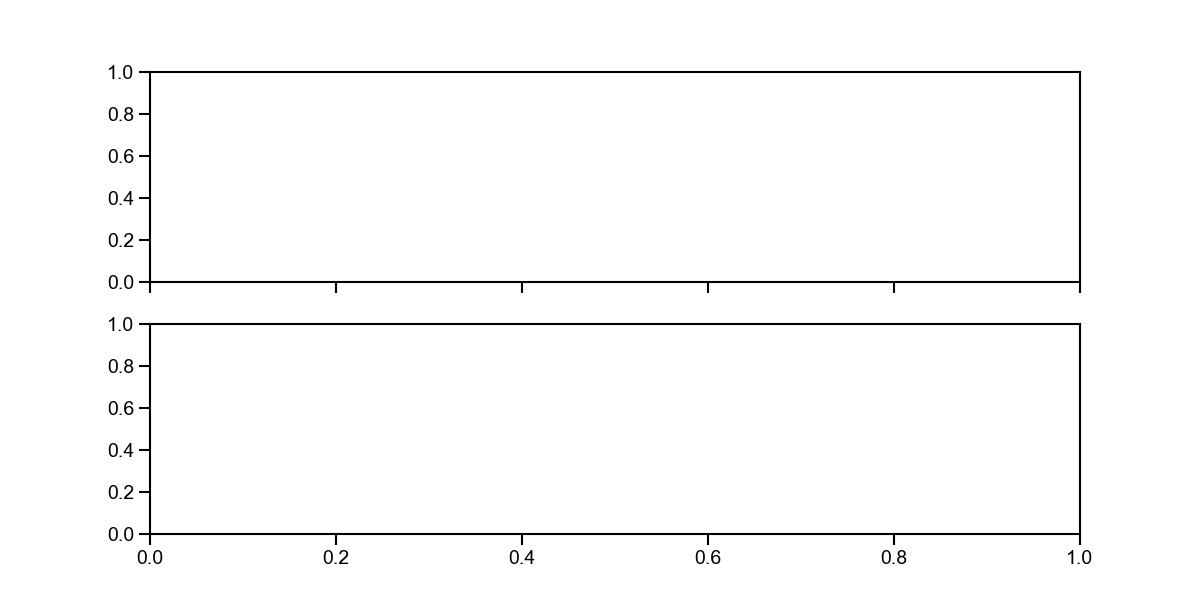

In [34]:
def plot_behaviors_two_panels(trx_data):
    """Plot behavioral states in two panels with interactive slider control."""
    plt.ioff()
    
    larva_ids = sorted(trx_data['data'].keys())
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
    
    # Define colors for behaviors
    run_cast_colors = {
        # Run behaviors - Red family
        # 'run': 'b',
        'run_large': 'b',
        'run_strong': 'r',
        # Cast behaviors - Blue family
        # 'cast': '#377eb8',
        # 'cast_large': '#7fb5d6',
        # 'cast_strong': '#00008b'
        
    }
    
    other_colors = {
        # Back behaviors - Green family
        'back': '#4daf4a',
        'back_large': '#90ee90',
        'back_strong': '#006400',
        # Hunch behaviors - Purple family
        'hunch': '#984ea3',
        'hunch_large': '#dda0dd',
        'hunch_strong': '#4b0082',
        # Roll behaviors - Orange family
        'roll': '#ff7f00',
        'roll_large': '#ffa500',
        'roll_strong': '#8b4513',
        # Stop behaviors - Gray family
        'stop': '#666666',
        'stop_large': '#a9a9a9',
        'stop_strong': '#1a1a1a'
    }
    
    # Create interactive controls
    play = widgets.Play(
        value=0,
        min=0,
        max=len(larva_ids) - 1,
        step=1,
        interval=500,
        description="Play"
    )
    
    slider = widgets.IntSlider(
        min=0,
        max=len(larva_ids) - 1,
        description='Larva:',
        value=0,
        style={'description_width': 'initial'},
        readout_format='d',
        layout=widgets.Layout(width='1000px')
    )
    
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    def plot_behaviors(ax, behaviors_dict, data, time):
        """Helper function to plot behaviors on a given axis"""
        for behavior, color in behaviors_dict.items():
            if behavior in data:
                # Normalize from [-1,1] to [0,1]
                behavior_data = (np.array(data[behavior]) + 1) / 2
                mask = behavior_data > 0.5
                
                edges = np.diff(mask.astype(int))
                starts = np.where(edges == 1)[0] + 1
                ends = np.where(edges == -1)[0] + 1
                
                if mask[0]: starts = np.r_[0, starts]
                if mask[-1]: ends = np.r_[ends, len(mask)-1]
                
                for start, end in zip(starts, ends):
                    ax.axvspan(time[start], time[end], 
                             color=color, alpha=0.3,
                             label=behavior.replace('_', ' ').title() if start == starts[0] else "")
    
    def update_plot(change):
        if change['type'] == 'change' and change['name'] == 'value':
            ax1.clear()
            ax2.clear()
            
            larva_id = larva_ids[change['new']]
            time = np.array(trx_data['data'][larva_id]['t'])
            
            # Plot run/cast behaviors
            plot_behaviors(ax1, run_cast_colors, trx_data['data'][larva_id], time)
            ax1.set_title('Run and Cast Behaviours')
            ax1.set_yticks([])
            ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
            # Plot other behaviors
            plot_behaviors(ax2, other_colors, trx_data['data'][larva_id], time)
            ax2.set_title('Other Behaviours')
            ax2.set_xlabel('Time (s)')
            ax2.set_yticks([])
            ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
            # Set common properties
            for ax in [ax1, ax2]:
                ax.set_ylim(0, 1)
            
            plt.suptitle(f'Behavioural States - Larva {larva_id}', y=1.0, fontsize=14)
            plt.tight_layout()
            fig.canvas.draw_idle()
    
    slider.observe(update_plot)
    
    display(widgets.HBox([play, slider]))
    display(fig.canvas)
    
    update_plot({'type': 'change', 'name': 'value', 'new': 0})

# Use the function
plot_behaviors_two_panels(trx_data)

/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_1217/2912554771.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


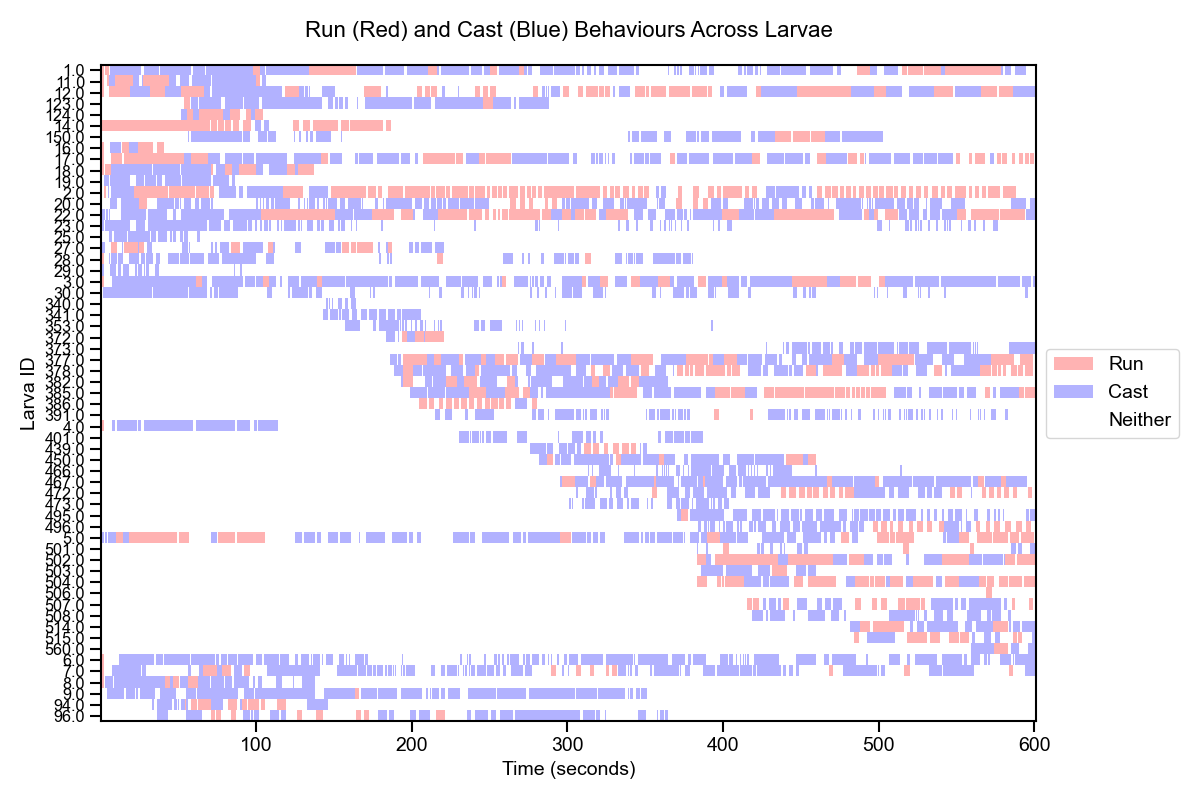

In [35]:
def plot_behavior_matrix(trx_data):
    """Plot run and cast behaviours in a single matrix with one row per larva."""
    
    # Get sorted larva IDs
    larva_ids = sorted(trx_data['data'].keys())
    
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Find time range
    min_time = min(min(trx_data['data'][lid]['t']) for lid in larva_ids)
    max_time = max(max(trx_data['data'][lid]['t']) for lid in larva_ids)
    
    # Create matrix for behaviors
    n_larvae = len(larva_ids)
    
    # Create a masked array to handle missing data points
    behavior_matrix = np.full((n_larvae, 1000, 3), fill_value=1.0)  # White background
    
    # Fill matrix with behavioral states
    for i, larva_id in enumerate(larva_ids):
        larva_time = np.array(trx_data['data'][larva_id]['t'])
        run_data = (np.array(trx_data['data'][larva_id]['run_large']) + 1) / 2
        cast_data = (np.array(trx_data['data'][larva_id]['cast_large']) + 1) / 2
        
        # Normalize time to indices
        time_indices = ((larva_time - min_time) / (max_time - min_time) * 999).astype(int)
        
        # Set colors directly at time points
        for t_idx, (run, cast) in zip(time_indices, zip(run_data, cast_data)):
            if run > 0.5:  # Run behavior
                behavior_matrix[i, t_idx] = [1, 0.7, 0.7]  # Light red
            elif cast > 0.5:  # Cast behavior
                behavior_matrix[i, t_idx] = [0.7, 0.7, 1]  # Light blue
            else:  # Neither
                behavior_matrix[i, t_idx] = [1, 1, 1]  # White
    
    # Plot matrix
    plt.imshow(behavior_matrix, aspect='auto', interpolation='nearest',
               extent=[min_time, max_time, n_larvae, 0])
    
    # Set y-axis labels
    plt.yticks(np.arange(0.5, n_larvae + 0.5), larva_ids, fontsize='small')
    
    # Customize plot
    plt.title('Run (Red) and Cast (Blue) Behaviours Across Larvae', pad=20)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Larva ID')
    
    # Create custom legend patches
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=(1, 0.7, 0.7), label='Run'),
        Patch(facecolor=(0.7, 0.7, 1), label='Cast'),
        Patch(facecolor=(1, 1, 1), label='Neither')
    ]
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()

# Generate visualization
plot_behavior_matrix(trx_data)

In [36]:
def plot_behaviors_and_save_video(trx_data, output_path='larva_behaviours.mp4', fps=2):
    """Plot behavioural states and save as video."""
    plt.ioff()
    larva_ids = sorted(trx_data['data'].keys())
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
    
    # Define color schemes for both panels
    run_cast_colors = {
        'run': '#e41a1c',
        'run_large': '#ff7f7f',
        'run_strong': '#8b0000',
        'cast': '#377eb8',
        'cast_large': '#7fb5d6',
        'cast_strong': '#00008b'
    }
    
    other_colors = {
        'back': '#4daf4a',
        'back_large': '#90ee90',
        'back_strong': '#006400',
        'hunch': '#984ea3',
        'hunch_large': '#dda0dd',
        'hunch_strong': '#4b0082',
        'roll': '#ff7f00',
        'roll_large': '#ffa500',
        'roll_strong': '#8b4513',
        'stop': '#666666',
        'stop_large': '#a9a9a9',
        'stop_strong': '#1a1a1a'
    }
    
    def plot_behaviors(ax, behaviors_dict, data, time):
        """Helper function to plot behaviours on a given axis"""
        for behavior, color in behaviors_dict.items():
            if behavior in data:
                behavior_data = (np.array(data[behavior]) + 1) / 2
                mask = behavior_data > 0.5
                
                edges = np.diff(mask.astype(int))
                starts = np.where(edges == 1)[0] + 1
                ends = np.where(edges == -1)[0] + 1
                
                if mask[0]: starts = np.r_[0, starts]
                if mask[-1]: ends = np.r_[ends, len(mask)-1]
                
                for start, end in zip(starts, ends):
                    ax.axvspan(time[start], time[end], 
                             color=color, alpha=0.3,
                             label=behavior.replace('_', ' ').title() if start == starts[0] else "")
    
    # Set up the video writer
    writer = animation.FFMpegWriter(fps=fps)
    
    # Create directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    with writer.saving(fig, output_path, dpi=100):
        for idx, larva_id in enumerate(larva_ids):
            ax1.clear()
            ax2.clear()
            
            time = np.array(trx_data['data'][larva_id]['t'])
            
            # Plot both behavior panels
            plot_behaviors(ax1, run_cast_colors, trx_data['data'][larva_id], time)
            plot_behaviors(ax2, other_colors, trx_data['data'][larva_id], time)
            
            # Set panel properties
            ax1.set_title('Run and Cast Behaviours')
            ax2.set_title('Other Behaviours')
            ax2.set_xlabel('Time (s)')
            
            # Remove y-ticks from both panels
            ax1.set_yticks([])
            ax2.set_yticks([])
            
            # Add legends
            ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
            # Set y-axis limits
            ax1.set_ylim(0, 1)
            ax2.set_ylim(0, 1)
            
            plt.suptitle(f'Behavioural States - Larva {larva_id}', y=1.0, fontsize=14)
            plt.tight_layout()
            
            writer.grab_frame()
            print(f"Processing larva {idx+1}/{len(larva_ids)}", end='\r')
        
        print("\nVideo saved successfully!")

# Required imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Install ffmpeg if needed:
# In terminal: brew install ffmpeg

# Generate the video
plot_behaviors_and_save_video(trx_data, '../results/larva_behaviors.mp4', fps=2)

/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_1217/1496346569.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))


/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_1217/1496346569.py:81: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


Processing larva 59/59
Video saved successfully!


In [ ]:
    # behaviors = {
    #     'run': '#e41a1c',
    #     'run_large': '#ff7f7f',
    #     'run_strong': '#8b0000',
    #     'cast': '#377eb8',
    #     'cast_large': '#7fb5d6',
    #     'cast_strong': '#00008b',
    #     # 'back': '#4daf4a',
    #     # 'back_large': '#90ee90',
    #     # 'back_strong': '#006400',
    #     # 'hunch': '#984ea3',
    #     # 'hunch_large': '#dda0dd',
    #     # 'hunch_strong': '#4b0082',
    #     # 'roll': '#ff7f00',
    #     # 'roll_large': '#ffa500',
    #     # 'roll_strong': '#8b4513',
    #     # 'stop': '#666666',
    #     # 'stop_large': '#a9a9a9',
    #     # 'stop_strong': '#1a1a1a'
    # }
    

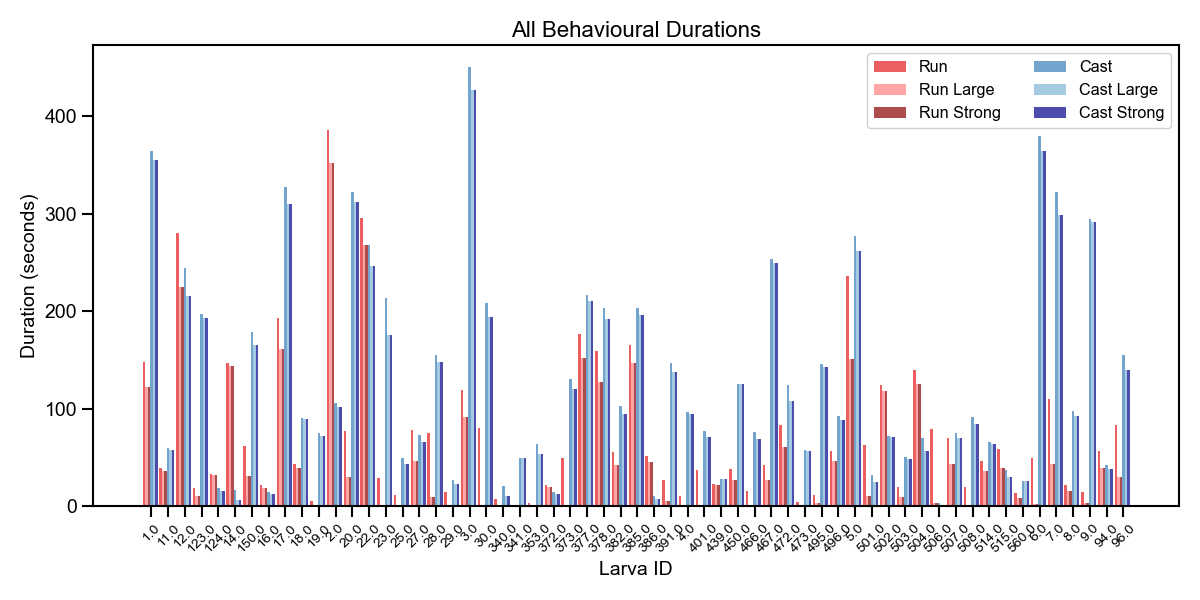

In [38]:
def plot_behavioural_metrics(trx_data):
    """Plot all behavioural metrics side by side in a single graph."""
    
    # Define behaviour groups and their colours
    behaviours = {
        'run': '#e41a1c',
        'run_large': '#ff7f7f',
        'run_strong': '#8b0000',
        'cast': '#377eb8',
        'cast_large': '#7fb5d6',
        'cast_strong': '#00008b'
    }
    
    larva_ids = sorted(trx_data["data"].keys())
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Calculate x positions with spacing
    x = np.arange(len(larva_ids)) * 2
    width = 0.3
    
    # Plot each behaviour type side by side
    for i, (behaviour, colour) in enumerate(behaviours.items()):
        durations = []
        for larva_id in larva_ids:
            frames = trx_data["data"][larva_id].get(f"{behaviour}_duration", 0)
            time_data = np.array(trx_data["data"][larva_id]['t'])
            frame_duration = np.mean(np.diff(time_data))
            durations.append(frames * frame_duration)
        
        # Plot bars with offset
        plt.bar(x + width * (i - len(behaviours)/2), durations,
                width, label=behaviour.replace('_', ' ').title(),
                color=colour, alpha=0.7)
    
    # Customise plot
    plt.title('All Behavioural Durations')
    plt.xlabel('Larva ID')
    plt.ylabel('Duration (seconds)')
    plt.xticks(x, larva_ids, rotation=45, fontsize=10)
    
    # Add compact legend in top left
    plt.legend(loc='upper right',
              ncol=2,  # Show legend in 2 columns
              fontsize='small',  # Reduce font size
              framealpha=0.9)    # Make background slightly transparent
    
    plt.tight_layout()
    plt.show()

# Generate graph
plot_behavioural_metrics(trx_data)

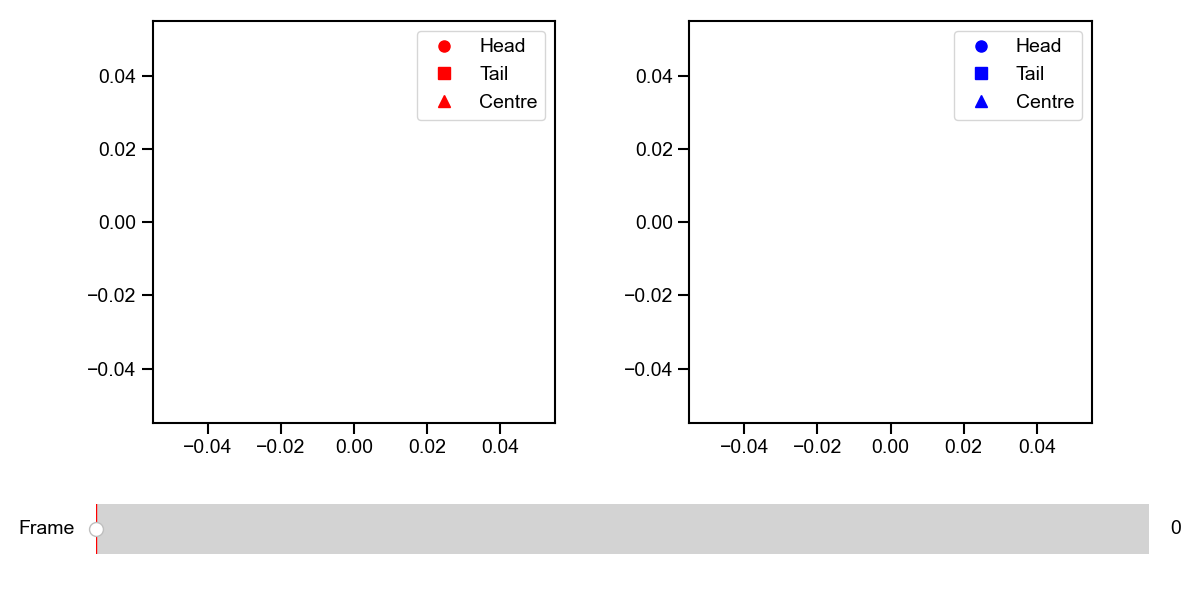

In [40]:
def plot_spine_behaviors(trx_data, larva_id):
    """Plot head, tail, and center points during run and cast behaviours."""
    
    # Get data for this larva
    larva = trx_data['data'][larva_id]
    x_spine = np.array(larva['x_spine'])  # Shape: (11, timesteps)
    y_spine = np.array(larva['y_spine'])
    x_centre = np.array(larva['x_center'])
    y_centre = np.array(larva['y_center'])
    time = np.array(larva['t'])
    
    # Get behavioural states (-1/1 encoded)
    run_frames = np.where((np.array(larva['run']) + 1) / 2)[0]
    cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
    
    # Create figure with two subplots
    fig = plt.figure(figsize=(12,6))
    gs = plt.GridSpec(2, 2, height_ratios=[4, 1])
    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])
    
    # Initialize empty line plots for both behaviors
    run_lines, = ax1.plot([], [], 'r-', lw=1, alpha=0.6)
    run_head, = ax1.plot([], [], 'ro', ms=8, label='Head')
    run_tail, = ax1.plot([], [], 'rs', ms=8, label='Tail')
    run_centre, = ax1.plot([], [], 'r^', ms=8, label='Centre')
    
    cast_lines, = ax2.plot([], [], 'b-', lw=1, alpha=0.6)
    cast_head, = ax2.plot([], [], 'bo', ms=8, label='Head')
    cast_tail, = ax2.plot([], [], 'bs', ms=8, label='Tail')
    cast_centre, = ax2.plot([], [], 'b^', ms=8, label='Centre')
    
    # Set aspect ratio
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    
    def update(frame):
        # Get spine points for current frame
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        centre_x, centre_y = x_centre[frame], y_centre[frame]
        
        # Points for connecting lines
        x_points = [head_x, centre_x, tail_x]
        y_points = [head_y, centre_y, tail_y]
        
        # Calculate window size based on current points
        points = np.array([[head_x, head_y], [tail_x, tail_y], [centre_x, centre_y]])
        center = np.mean(points, axis=0)
        max_dist = np.max(np.linalg.norm(points - center, axis=1))
        window_size = max_dist * 3
        
        # Update run plot
        if frame in run_frames:
            run_lines.set_data(x_points, y_points)
            run_head.set_data([head_x], [head_y])
            run_tail.set_data([tail_x], [tail_y])
            run_centre.set_data([centre_x], [centre_y])
            ax1.set_xlim(center[0] - window_size, center[0] + window_size)
            ax1.set_ylim(center[1] - window_size, center[1] + window_size)
            ax1.set_title(f'Run Behaviour (t={time[frame]:.2f}s)', fontsize=12)
        else:
            run_lines.set_data([], [])
            run_head.set_data([], [])
            run_tail.set_data([], [])
            run_centre.set_data([], [])
            ax1.set_title('Run Behaviour (inactive)', fontsize=12)
        
        # Update cast plot
        if frame in cast_frames:
            cast_lines.set_data(x_points, y_points)
            cast_head.set_data([head_x], [head_y])
            cast_tail.set_data([tail_x], [tail_y])
            cast_centre.set_data([centre_x], [centre_y])
            ax2.set_xlim(center[0] - window_size, center[0] + window_size)
            ax2.set_ylim(center[1] - window_size, center[1] + window_size)
            ax2.set_title(f'Cast Behaviour (t={time[frame]:.2f}s)', fontsize =12)
        else:
            cast_lines.set_data([], [])
            cast_head.set_data([], [])
            cast_tail.set_data([], [])
            cast_centre.set_data([], [])
            ax2.set_title('Cast Behaviour (inactive)', fontsize=12)
        
        return (run_lines, run_head, run_tail, run_centre,
                cast_lines, cast_head, cast_tail, cast_centre)
    
    # Add legends
    ax1.legend()
    ax2.legend()
    
    # Create slider
    ax_slider = plt.subplot(gs[1, :])
    slider = widgets.Slider(
        ax=ax_slider,
        label='Frame',
        valmin=0,
        valmax=len(time)-1,
        valinit=0,
        valstep=1
    )
    
    def update_slider(val):
        update(int(val))
        fig.canvas.draw_idle()
    
    def on_key(event):
        if event.key == 'right':
            # Move forward one frame
            new_val = min(slider.val + 1, slider.valmax)
            slider.set_val(new_val)
        elif event.key == 'left':
            # Move backward one frame
            new_val = max(slider.val - 1, slider.valmin)
            slider.set_val(new_val)
    
    # Connect events
    slider.on_changed(update_slider)
    fig.canvas.mpl_connect('key_press_event', on_key)
    
    plt.tight_layout()
    plt.show()

# Required imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import widgets

# Generate visualization
first_larva = sorted(trx_data['data'].keys())[2]
plot_spine_behaviors(trx_data, first_larva)

## Important for direction calculation
As Tihana said, sometimes head and tail are exchanged, so in that case, direction calculation may be misinterpreted. CHECK FOR THIS

In [41]:
def classify_cast_direction(x_spine, y_spine, x_centre, y_centre, cast_frames):
    """
    Classify cast directions as left or right based on head position relative to tail-centre vector.
    Returns dictionary with cast direction counts and percentages.
    """
    directions = []
    
    for frame in cast_frames:
        # Get coordinates
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        centre_x, centre_y = x_centre[frame], y_centre[frame]
        
        # Create vectors
        tail_to_centre = np.array([centre_x - tail_x, centre_y - tail_y])
        tail_to_head = np.array([head_x - tail_x, head_y - tail_y])
        
        # Calculate cross product
        cross_product = np.cross(tail_to_centre, tail_to_head)
        
        # Classify direction (positive cross product = left cast)
        directions.append('left' if cross_product > 0 else 'right')
    
    # Calculate statistics
    total_casts = len(directions)
    left_casts = directions.count('left')
    right_casts = directions.count('right')
    
    stats = {
        'total_casts': total_casts,
        'left_casts': left_casts,
        'right_casts': right_casts,
        'left_percentage': (left_casts / total_casts * 100) if total_casts > 0 else 0,
        'right_percentage': (right_casts / total_casts * 100) if total_casts > 0 else 0
    }
    
    return stats

def analyze_all_larvae_cast_directions(trx_data):
    """Analyze cast directions for all larvae."""
    results = {}
    
    for larva_id in sorted(trx_data['data'].keys()):
        larva = trx_data['data'][larva_id]
        
        # Get necessary data
        x_spine = np.array(larva['x_spine'])
        y_spine = np.array(larva['y_spine'])
        x_centre = np.array(larva['x_center'])
        y_centre = np.array(larva['y_center'])
        cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
        
        # Calculate statistics
        stats = classify_cast_direction(x_spine, y_spine, x_centre, y_centre, cast_frames)
        results[larva_id] = stats
    
    # Print summary
    print("\nCast Direction Analysis for All Larvae:")
    print("-" * 50)
    for larva_id, stats in results.items():
        print(f"\nLarva {larva_id}:")
        print(f"Total casts: {stats['total_casts']}")
        print(f"Left casts: {stats['left_casts']} ({stats['left_percentage']:.1f}%)")
        print(f"Right casts: {stats['right_casts']} ({stats['right_percentage']:.1f}%)")
    
    return results

# Run analysis
cast_direction_results = analyze_all_larvae_cast_directions(trx_data)

/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_1217/3177737271.py:19: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  cross_product = np.cross(tail_to_centre, tail_to_head)



Cast Direction Analysis for All Larvae:
--------------------------------------------------

Larva 1.0:
Total casts: 4244
Left casts: 2216 (52.2%)
Right casts: 2028 (47.8%)

Larva 11.0:
Total casts: 746
Left casts: 346 (46.4%)
Right casts: 400 (53.6%)

Larva 12.0:
Total casts: 2849
Left casts: 861 (30.2%)
Right casts: 1988 (69.8%)

Larva 123.0:
Total casts: 2271
Left casts: 1483 (65.3%)
Right casts: 788 (34.7%)

Larva 124.0:
Total casts: 218
Left casts: 164 (75.2%)
Right casts: 54 (24.8%)

Larva 14.0:
Total casts: 198
Left casts: 198 (100.0%)
Right casts: 0 (0.0%)

Larva 150.0:
Total casts: 2049
Left casts: 796 (38.8%)
Right casts: 1253 (61.2%)

Larva 16.0:
Total casts: 209
Left casts: 102 (48.8%)
Right casts: 107 (51.2%)

Larva 17.0:
Total casts: 3810
Left casts: 2392 (62.8%)
Right casts: 1418 (37.2%)

Larva 18.0:
Total casts: 1110
Left casts: 646 (58.2%)
Right casts: 464 (41.8%)

Larva 19.0:
Total casts: 950
Left casts: 509 (53.6%)
Right casts: 441 (46.4%)

Larva 2.0:
Total casts: 12

/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_1217/3177737271.py:19: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  cross_product = np.cross(tail_to_centre, tail_to_head)



Cast Direction Analysis for All Larvae:
--------------------------------------------------

Larva 1.0:
Total casts: 4244
Left casts: 2216 (52.2%)
Right casts: 2028 (47.8%)

Larva 11.0:
Total casts: 746
Left casts: 346 (46.4%)
Right casts: 400 (53.6%)

Larva 12.0:
Total casts: 2849
Left casts: 861 (30.2%)
Right casts: 1988 (69.8%)

Larva 123.0:
Total casts: 2271
Left casts: 1483 (65.3%)
Right casts: 788 (34.7%)

Larva 124.0:
Total casts: 218
Left casts: 164 (75.2%)
Right casts: 54 (24.8%)

Larva 14.0:
Total casts: 198
Left casts: 198 (100.0%)
Right casts: 0 (0.0%)

Larva 150.0:
Total casts: 2049
Left casts: 796 (38.8%)
Right casts: 1253 (61.2%)

Larva 16.0:
Total casts: 209
Left casts: 102 (48.8%)
Right casts: 107 (51.2%)

Larva 17.0:
Total casts: 3810
Left casts: 2392 (62.8%)
Right casts: 1418 (37.2%)

Larva 18.0:
Total casts: 1110
Left casts: 646 (58.2%)
Right casts: 464 (41.8%)

Larva 19.0:
Total casts: 950
Left casts: 509 (53.6%)
Right casts: 441 (46.4%)

Larva 2.0:
Total casts: 12

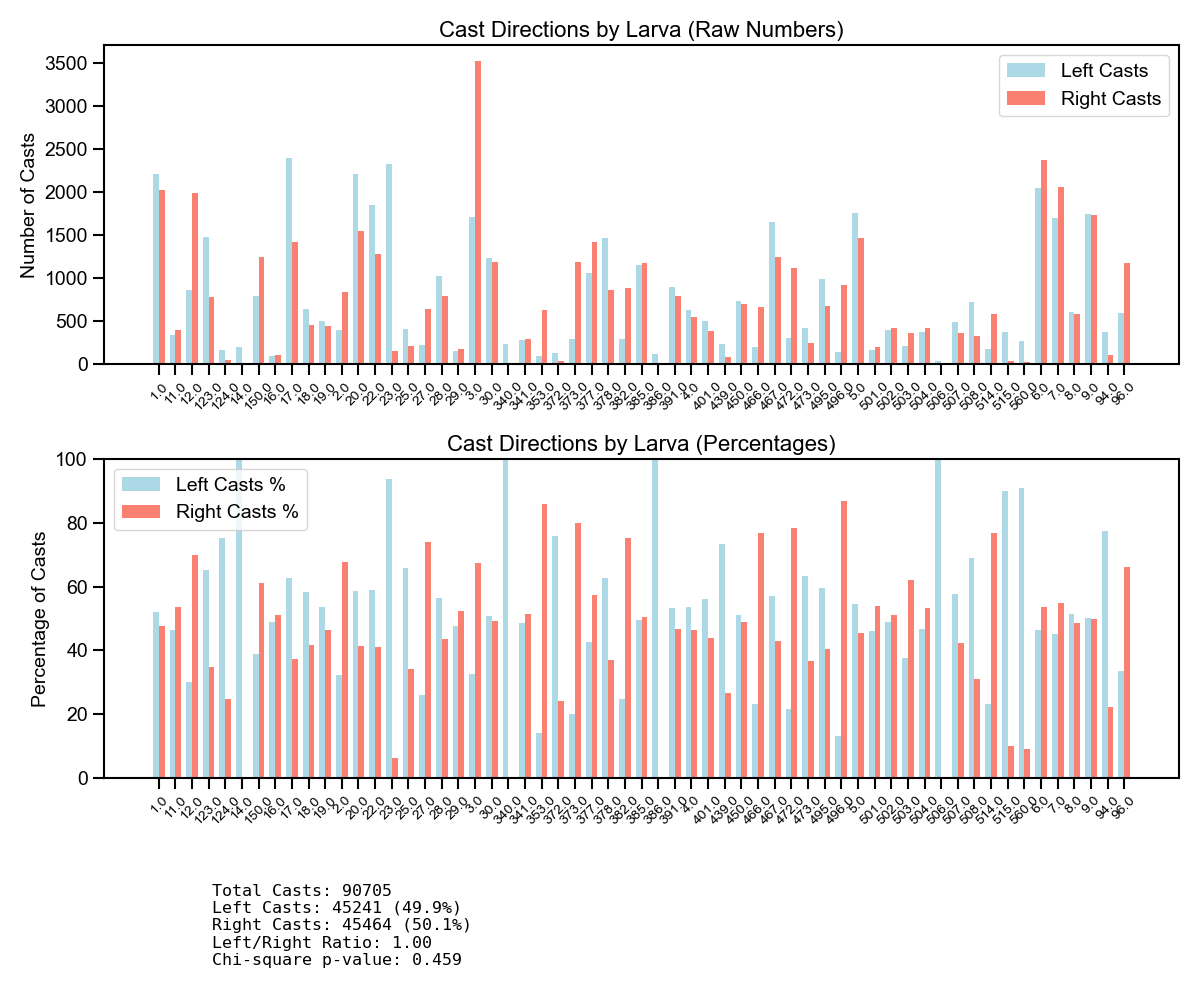

In [42]:
def plot_cast_statistics(results):
    """Plot cast direction statistics for all larvae with percentages."""
    
    # Get data for plotting
    larva_ids = list(results.keys())
    left_casts = [results[lid]['left_casts'] for lid in larva_ids]
    right_casts = [results[lid]['right_casts'] for lid in larva_ids]
    total_per_larva = [l + r for l, r in zip(left_casts, right_casts)]
    
    # Calculate percentages
    left_percentages = [l/t*100 if t > 0 else 0 for l, t in zip(left_casts, total_per_larva)]
    right_percentages = [r/t*100 if t > 0 else 0 for r, t in zip(right_casts, total_per_larva)]
    
    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), 
                                       height_ratios=[3, 3, 1])
    
    # Plot 1: Raw numbers
    x = np.arange(len(larva_ids))
    width = 0.35
    
    ax1.bar(x - width/2, left_casts, width, label='Left Casts', 
            color='lightblue')
    ax1.bar(x + width/2, right_casts, width, label='Right Casts', 
            color='salmon')
    
    ax1.set_ylabel('Number of Casts')
    ax1.set_title('Cast Directions by Larva (Raw Numbers)')
    ax1.set_xticks(x)
    ax1.set_xticklabels(larva_ids, rotation=45, fontsize=10)
    ax1.legend()
    
    # Plot 2: Percentages
    ax2.bar(x - width/2, left_percentages, width, 
            label='Left Casts %', color='lightblue')
    ax2.bar(x + width/2, right_percentages, width, 
            label='Right Casts %', color='salmon')
    
    ax2.set_ylabel('Percentage of Casts')
    ax2.set_title('Cast Directions by Larva (Percentages)')
    ax2.set_xticks(x)
    ax2.set_xticklabels(larva_ids, rotation=45, fontsize=10)
    ax2.legend()
    ax2.set_ylim(0, 100)
    
    # Statistics table
    total_left = sum(left_casts)
    total_right = sum(right_casts)
    total_casts = total_left + total_right
    
    stats_text = [
        f"Total Casts: {total_casts}",
        f"Left Casts: {total_left} ({total_left/total_casts*100:.1f}%)",
        f"Right Casts: {total_right} ({total_right/total_casts*100:.1f}%)",
        f"Left/Right Ratio: {total_left/total_right:.2f}",
        f"Chi-square p-value: {stats.chisquare([total_left, total_right])[1]:.3f}"
    ]
    
    ax3.axis('off')
    ax3.text(0.1, 0.5, '\n'.join(stats_text), 
             fontsize=12, fontfamily='monospace',
             verticalalignment='center')
    
    plt.tight_layout()
    plt.show()

# Required imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Run analysis and plot results
cast_direction_results = analyze_all_larvae_cast_directions(trx_data)
plot_cast_statistics(cast_direction_results)

## NOW, look at upstream v/s downstream head casts
Instead of left and right head casts, which ... interestingly seem unbiased, define upstream and downstream, by getting the cross product with the unit vector in the wind direction (x-axis).

In [43]:
def analyze_all_larvae_cast_directions(trx_data):
    """Analyze cast directions for all larvae."""
    results = {}
    
    for larva_id in sorted(trx_data['data'].keys()):
        larva = trx_data['data'][larva_id]
        
        # Get necessary data
        x_spine = np.array(larva['x_spine'])
        y_spine = np.array(larva['y_spine'])
        x_centre = np.array(larva['x_center'])
        y_centre = np.array(larva['y_center'])
        cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
        
        # Calculate statistics
        stats = classify_cast_direction(x_spine, y_spine, x_centre, y_centre, cast_frames)
        results[larva_id] = stats
    
        # Print summary with updated keys
        print(f"\nLarva {larva_id}:")
        print(f"Total casts: {stats['total_casts']}")
        print(f"Upstream casts: {stats['upstream_casts']} ({stats['upstream_percentage']:.1f}%)")
        print(f"Downstream casts: {stats['downstream_casts']} ({stats['downstream_percentage']:.1f}%)")
    
    return results

/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_1217/3443189523.py:20: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  cross_product = np.cross(x_axis, tail_to_head)



Larva 1.0:
Total casts: 4244
Upstream casts: 2484 (58.5%)
Downstream casts: 1760 (41.5%)

Larva 11.0:
Total casts: 746
Upstream casts: 627 (84.0%)
Downstream casts: 119 (16.0%)

Larva 12.0:
Total casts: 2849
Upstream casts: 1191 (41.8%)
Downstream casts: 1658 (58.2%)

Larva 123.0:
Total casts: 2271
Upstream casts: 821 (36.2%)
Downstream casts: 1450 (63.8%)

Larva 124.0:
Total casts: 218
Upstream casts: 218 (100.0%)
Downstream casts: 0 (0.0%)

Larva 14.0:
Total casts: 198
Upstream casts: 198 (100.0%)
Downstream casts: 0 (0.0%)

Larva 150.0:
Total casts: 2049
Upstream casts: 1278 (62.4%)
Downstream casts: 771 (37.6%)

Larva 16.0:
Total casts: 209
Upstream casts: 164 (78.5%)
Downstream casts: 45 (21.5%)

Larva 17.0:
Total casts: 3810
Upstream casts: 1945 (51.0%)
Downstream casts: 1865 (49.0%)

Larva 18.0:
Total casts: 1110
Upstream casts: 304 (27.4%)
Downstream casts: 806 (72.6%)

Larva 19.0:
Total casts: 950
Upstream casts: 950 (100.0%)
Downstream casts: 0 (0.0%)

Larva 2.0:
Total casts

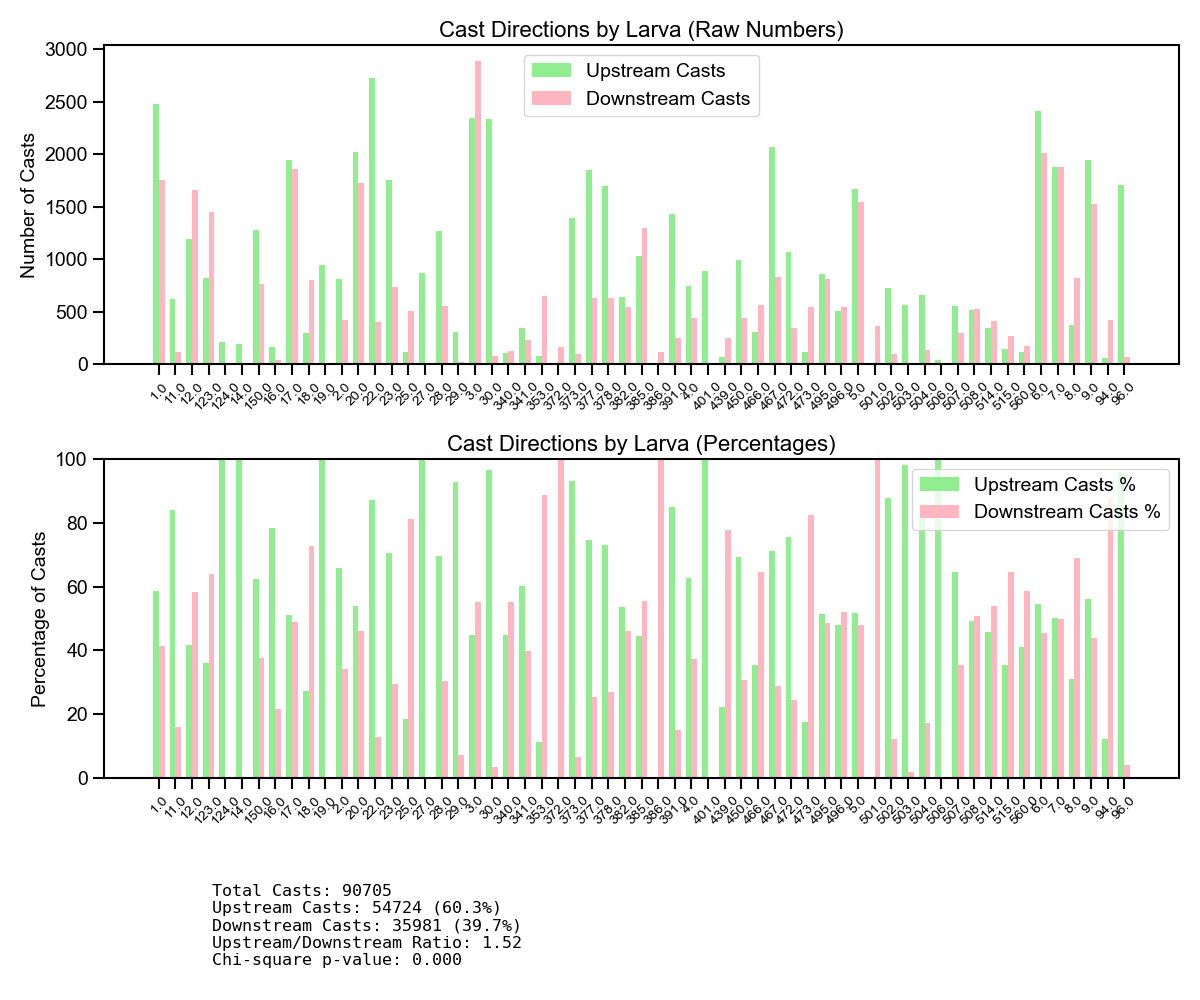

In [44]:
def classify_cast_direction(x_spine, y_spine, x_centre, y_centre, cast_frames):
    """
    Classify cast directions as upstream/downstream based on head position 
    relative to tail-centre vector and x-axis reference.
    """
    directions = []
    x_axis = np.array([1, 0])  # Reference vector pointing right (upstream)
    
    for frame in cast_frames:
        # Get coordinates
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        centre_x, centre_y = x_centre[frame], y_centre[frame]
        
        # Create vectors
        tail_to_centre = np.array([centre_x - tail_x, centre_y - tail_y])
        tail_to_head = np.array([head_x - tail_x, head_y - tail_y])
        
        # Calculate cross product with x-axis
        cross_product = np.cross(x_axis, tail_to_head)
        
        # Classify direction (positive cross product = downstream)
        directions.append('downstream' if cross_product > 0 else 'upstream')
    
    # Calculate statistics
    total_casts = len(directions)
    upstream_casts = directions.count('upstream')
    downstream_casts = directions.count('downstream')
    
    stats = {
        'total_casts': total_casts,
        'upstream_casts': upstream_casts,
        'downstream_casts': downstream_casts,
        'upstream_percentage': (upstream_casts / total_casts * 100) if total_casts > 0 else 0,
        'downstream_percentage': (downstream_casts / total_casts * 100) if total_casts > 0 else 0
    }
    
    return stats

def plot_cast_statistics(results):
    """Plot cast direction statistics for all larvae with percentages."""
    
    # Get data for plotting
    larva_ids = list(results.keys())
    upstream_casts = [results[lid]['upstream_casts'] for lid in larva_ids]
    downstream_casts = [results[lid]['downstream_casts'] for lid in larva_ids]
    total_per_larva = [u + d for u, d in zip(upstream_casts, downstream_casts)]
    
    # Calculate percentages
    upstream_percentages = [u/t*100 if t > 0 else 0 for u, t in zip(upstream_casts, total_per_larva)]
    downstream_percentages = [d/t*100 if t > 0 else 0 for d, t in zip(downstream_casts, total_per_larva)]
    
    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), 
                                       height_ratios=[3, 3, 1])
    
    # Plot 1: Raw numbers
    x = np.arange(len(larva_ids))
    width = 0.35
    
    ax1.bar(x - width/2, upstream_casts, width, label='Upstream Casts', 
            color='lightgreen')
    ax1.bar(x + width/2, downstream_casts, width, label='Downstream Casts', 
            color='lightpink')
    
    ax1.set_ylabel('Number of Casts')
    ax1.set_title('Cast Directions by Larva (Raw Numbers)')
    ax1.set_xticks(x)
    ax1.set_xticklabels(larva_ids, rotation=45, fontsize=10)
    ax1.legend()
    
    # Plot 2: Percentages
    ax2.bar(x - width/2, upstream_percentages, width, 
            label='Upstream Casts %', color='lightgreen')
    ax2.bar(x + width/2, downstream_percentages, width, 
            label='Downstream Casts %', color='lightpink')
    
    ax2.set_ylabel('Percentage of Casts')
    ax2.set_title('Cast Directions by Larva (Percentages)')
    ax2.set_xticks(x)
    ax2.set_xticklabels(larva_ids, rotation=45,fontsize=10)
    ax2.legend()
    ax2.set_ylim(0, 100)
    
    # Statistics table
    total_upstream = sum(upstream_casts)
    total_downstream = sum(downstream_casts)
    total_casts = total_upstream + total_downstream
    
    stats_text = [
        f"Total Casts: {total_casts}",
        f"Upstream Casts: {total_upstream} ({total_upstream/total_casts*100:.1f}%)",
        f"Downstream Casts: {total_downstream} ({total_downstream/total_casts*100:.1f}%)",
        f"Upstream/Downstream Ratio: {total_upstream/total_downstream:.2f}",
        f"Chi-square p-value: {stats.chisquare([total_upstream, total_downstream])[1]:.3f}"
    ]
    
    ax3.axis('off')
    ax3.text(0.1, 0.5, '\n'.join(stats_text), 
             fontsize=12, fontfamily='monospace',
             verticalalignment='center')
    
    plt.tight_layout()
    plt.show()

# Required imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Run analysis and plot results
cast_direction_results = analyze_all_larvae_cast_directions(trx_data)
plot_cast_statistics(cast_direction_results)